In [ ]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from flask import Flask, request, jsonify
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [1]:
import os
import pandas as pd

# Function to list all CSV files in a directory
def list_csv_files(directory):
    csv_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

# Specify the directory containing the CSV files
directory = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data'

# Fetch all CSV files
csv_files = list_csv_files(directory)

# Print the paths of the CSV files
for file in csv_files:
    print(file)

# Optionally, you can load all CSV files into a list of DataFrames
dataframes = [pd.read_csv(file) for file in csv_files]

# Display the first few rows of each DataFrame
for df in dataframes:
    display(df.head())

C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_GameCube.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_Nintendo_Switch.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_PC.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_Wii.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_Wii_U.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_Xbox 360.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_Xbox One.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_Xbox.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_video_games_P

Game   Copies sold Release date  \
0                            Luigi's Mansion  3.33 million   2001-09-14   
1                                     Pikmin  1.60 million   2001-10-26   
2  Star Wars Rogue Squadron II: Rogue Leader  1.13 million   2001-11-18   
3                    Super Smash Bros. Melee  7.41 million   2001-11-21   
4                            Animal Crossing  2.71 million   2001-12-14   

                      Genre       Developer  Publisher Console_name  
0          Action-adventure    Nintendo EAD   Nintendo     GameCube  
1  Real-time strategypuzzle    Nintendo EAD   Nintendo     GameCube  
2                    Action        Factor 5  LucasArts     GameCube  
3                  Fighting  HAL Laboratory   Nintendo     GameCube  
4         Social simulation    Nintendo EAD   Nintendo     GameCube

Title    Copies sold              As of  \
0  The Legend of Zelda: Breath of the Wild  31.85 million     March 31, 2024   
1                               1-2-Switch   3.74 million  December 31, 2022   
2                      Mario Kart 8 Deluxe  61.97 million     March 31, 2024   
3                                Minecraft   5.67 million        May 9, 2024   
4                                     Arms   2.72 million  December 31, 2022   

  Release date             Genre     Developer  \
0   2017-03-03  Action-adventure  Nintendo EPD   
1   2017-03-03             Party  Nintendo EPD   
2   2017-04-28       Kart racing  Nintendo EPD   
3   2017-05-11   Sandboxsurvival        Mojang   
4   2017-06-16          Fighting  Nintendo EPD   

                             Publisher     Console_name  
0                             Nintendo  Nintendo Switch  
1                             Nintendo  Nintendo Switch  
2                             Nintendo  Nintendo Switch  
3  JP: Xbox Game StudiosNA/PAL: Mojang  Nintendo Switch  
4                             Nintendo  Nintendo Switch

Game  Copies sold           Series  \
0                                 Hydlide    1 million          Hydlide   
1  Where in the World Is Carmen Sandiego?    4 million  Carmen Sandiego   
2                            Last Ninja 2  5.5 million       Last Ninja   
3                                Populous    4 million         Populous   
4                          Return to Zork    1 million             Zork   

  Release date                Genre                              Developer  \
0   1984-12-13  Action role-playing  Technology and Entertainment Software   
1   1985-06-01          Educational                             Broderbund   
2   1988-08-29     Action-adventure                               System 3   
3   1989-06-05             God game                   Bullfrog Productions   
4   1993-08-20            Adventure                                Infocom   

                               Publisher Console_name  
0  Technology and Entertainment Software           PC  
1                             Broderbund           PC  
2                             Activision           PC  
3                        Electronic Arts           PC  
4                             Activision           PC

Game    Copies sold Release date  \
0                            Wii Sports †  82.90 million   2006-11-19   
1  The Legend of Zelda: Twilight Princess   7.50 million   2006-11-19   
2                               Red Steel      1 million   2006-11-19   
3                   Rayman Raving Rabbids    1.2 million   2006-11-19   
4                                Wii Play  28.02 million   2006-12-02   

                  Genre               Developer Publisher Console_name  
0                Sports  Nintendo EAD (Group 2)  Nintendo          Wii  
1      Action-adventure  Nintendo EAD (Group 3)  Nintendo          Wii  
2  First-person shooter           Ubisoft Paris   Ubisoft          Wii  
3                 Party     Ubisoft Montpellier   Ubisoft          Wii  
4                 Party  Nintendo EAD (Group 2)  Nintendo          Wii

Game   Copies sold              As of  \
0               New Super Mario Bros. U † *  5.82 million     March 31, 2024   
1                           Nintendo Land †  5.21 million     March 31, 2024   
2                    Lego City Undercover *  1.15 million  December 31, 2022   
3                                Pikmin 3 *  1.28 million  December 31, 2022   
4  The Legend of Zelda: The Wind Waker HD †  2.37 million     March 31, 2024   

  Release date                     Genre     Developer Publisher Console_name  
0   2012-11-18                  Platform  Nintendo EAD  Nintendo        Wii U  
1   2012-11-18                     Party  Nintendo EAD  Nintendo        Wii U  
2   2013-03-18          Action-adventure     TT Fusion  Nintendo        Wii U  
3   2013-07-13  Real-time strategypuzzle  Nintendo EAD  Nintendo        Wii U  
4   2013-09-20          Action-adventure  Nintendo EAD  Nintendo        Wii U

Game    Copies sold Release date  \
0                                Call of Duty 2    1.4 million   2005-11-22   
1                             Perfect Dark Zero    1.5 million   2005-11-22   
2                               Dead or Alive 4      1 million   2005-12-29   
3                           Fight Night Round 3   1.29 million   2006-02-20   
4  Tom Clancy's Ghost Recon Advanced Warfighter  1.411 million   2006-03-09   

                         Genre                             Developer  \
0         First-person shooter                         Infinity Ward   
1  First-person shooterstealth                                  Rare   
2                     Fighting                            Team Ninja   
3                       Sports                            EA Chicago   
4             Tactical shooter  Ubisoft ParisRed Storm Entertainment   

                Publisher Console_name  
0              Activision     Xbox 360  
1  Microsoft Game Studios     Xbox 360  
2                   Tecmo     Xbox 360  
3               EA Sports     Xbox 360  
4                 Ubisoft     Xbox 360

Game   Copies sold Release date  \
0             Dead Rising 3  3.10 million   2013-11-22   
1        Forza Motorsport 5     2 million   2013-11-22   
2         Ryse: Son of Rome  1.28 million   2013-11-22   
3  The Witcher 3: Wild Hunt   4.3 million   2015-05-19   
4        Forza Motorsport 6     1 million   2015-09-15   

                               Genre         Developer          Publisher  \
0    Action-adventuresurvival horror  Capcom Vancouver  Xbox Game Studios   
1                             Racing   Turn 10 Studios  Xbox Game Studios   
2  Action-adventure · hack and slash            Crytek  Xbox Game Studios   
3                Action role-playing    CD Projekt Red         CD Projekt   
4                             Racing   Turn 10 Studios  Microsoft Studios   

  Console_name  
0     Xbox One  
1     Xbox One  
2     Xbox One  
3     Xbox One  
4     Xbox One

Game   Copies sold Release date  \
0              Halo: Combat Evolved     5 million   2001-11-15   
1             Project Gotham Racing   1.2 million   2001-11-15   
2                   Dead or Alive 3     2 million   2001-11-15   
3  The Elder Scrolls III: Morrowind  1.36 million   2002-06-06   
4          Tom Clancy's Ghost Recon  1.13 million   2002-11-11   

                  Genre                Developer  \
0  First-person shooter                   Bungie   
1                Racing        Bizarre Creations   
2              Fighting               Team Ninja   
3          Role-playing    Bethesda Game Studios   
4      Tactical shooter  Red Storm Entertainment   

                             Publisher Console_name  
0               Microsoft Game Studios         Xbox  
1               Microsoft Game Studios         Xbox  
2  WW: TecmoEU: Microsoft Game Studios         Xbox  
3                   Bethesda Softworks         Xbox  
4                             Ubi Soft         Xbox

Game          Copies sold Release date  \
0         Tekken Tag Tournament        2.467 million   2000-03-30   
1               Madden NFL 2001        1.236 million   2000-10-26   
2  Midnight Club: Street Racing        1.976 million   2000-10-26   
3                    Dark Cloud  1.2 million shipped   2000-12-14   
4            Onimusha: Warlords         2.02 million   2001-01-25   

                            Genre      Developer  \
0                        Fighting          Namco   
1                          Sports     EA Tiburon   
2                          Racing  Angel Studios   
3             Action role-playing        Level-5   
4  Action-adventurehack and slash         Capcom   

                                    Publisher   Console_name  
0    WW: NamcoEU: Sony Computer Entertainment  PlayStation 2  
1  NA/EU: EA SportsJP: Electronic Arts Square  PlayStation 2  
2                              Rockstar Games  PlayStation 2  
3                 Sony Computer Entertainment  PlayStation 2  
4                                      Capcom  PlayStation 2

Game    Copies sold Release date  \
0                       Resistance: Fall of Man    2.5 million   2006-11-14   
1                                    MotorStorm   3.31 million   2006-12-14   
2                                Heavenly Sword    1.5 million   2007-09-12   
3  Ratchet & Clank Future: Tools of Destruction   1.25 million   2007-10-23   
4                Call of Duty 4: Modern Warfare  1.977 million   2007-11-05   

                            Genre          Developer  \
0            First-person shooter    Insomniac Games   
1                          Racing  Evolution Studios   
2  Action-adventurehack and slash       Ninja Theory   
3        Platformaction-adventure    Insomniac Games   
4            First-person shooter      Infinity Ward   

                     Publisher   Console_name  
0  Sony Computer Entertainment  PlayStation 3  
1  Sony Computer Entertainment  PlayStation 3  
2  Sony Computer Entertainment  PlayStation 3  
3  Sony Computer Entertainment  PlayStation 3  
4                   Activision  PlayStation 3

Game  Copies sold Release date  \
0                             Knack    2 million   2013-11-15   
1             Killzone: Shadow Fall  2.1 million   2013-11-15   
2               Infamous Second Son    6 million   2014-03-21   
3         The Last of Us Remastered   10 million   2014-07-29   
4  Minecraft: PlayStation 4 Edition    2 million   2014-09-04   

                             Genre                 Developer  \
0              Platformbeat 'em up              Japan Studio   
1             First-person shooter           Guerrilla Games   
2                 Action-adventure  Sucker Punch Productions   
3  Action-adventuresurvival horror               Naughty Dog   
4                  Sandboxsurvival                4J Studios   

                     Publisher   Console_name  
0  Sony Computer Entertainment  PlayStation 4  
1  Sony Computer Entertainment  PlayStation 4  
2  Sony Computer Entertainment  PlayStation 4  
3  Sony Computer Entertainment  PlayStation 4  
4  Sony Computer Entertainment  PlayStation 4

Game   Copies sold Release date  \
0                Demon's Souls   1.4 million   2020-11-12   
1  Ratchet & Clank: Rift Apart  3.97 million   2021-06-11   
2                   Elden Ring  3.64 million   2022-02-25   
3            Final Fantasy XVI     3 million   2023-06-22   
4              EA Sports FC 24  1.04 million   2023-09-29   

                            Genre                               Developer  \
0             Action role-playing                         Bluepoint Games   
1  Platform, third-person shooter                         Insomniac Games   
2             Action role-playing                            FromSoftware   
3             Action role-playing  Square Enix Creative Business Unit III   
4                          Sports                   EA CanadaEA Bucharest   

                                    Publisher   Console_name  
0              Sony Interactive Entertainment  PlayStation 5  
1              Sony Interactive Entertainment  PlayStation 5  
2  Bandai Namco EntertainmentJP: FromSoftware  PlayStation 5  
3                                 Square Enix  PlayStation 5  
4                                   EA Sports  PlayStation 5

In [12]:
import os
import pandas as pd

# Function to list all CSV files in a directory
def list_csv_files(directory):
    csv_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

# Specify the directory containing the CSV files
directory = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data'

# Fetch all CSV files
csv_files = list_csv_files(directory)

# Print the paths of the CSV files
for file in csv_files:
    print(file)

# Load all CSV files into a list of DataFrames
dataframes = [pd.read_csv(file) for file in csv_files]

# Display the first few rows of each DataFrame
for df in dataframes:
    display(df)

C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_GameCube.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_Nintendo_Switch.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_PC.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_Wii.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_Wii_U.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_Xbox 360.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_Xbox One.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_games_Xbox.csv
C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\best_selling_video_games_P

Game   Copies sold Release date  \
0                             Luigi's Mansion  3.33 million   2001-09-14   
1                                      Pikmin  1.60 million   2001-10-26   
2   Star Wars Rogue Squadron II: Rogue Leader  1.13 million   2001-11-18   
3                     Super Smash Bros. Melee  7.41 million   2001-11-21   
4                             Animal Crossing  2.71 million   2001-12-14   
5                   Sonic Adventure 2: Battle  1.73 million   2001-12-20   
6                               Resident Evil  1.35 million   2002-03-22   
7                        Super Mario Sunshine  5.91 million   2002-07-19   
8                         Star Fox Adventures  1.82 million   2002-09-23   
9                               Mario Party 4  2.46 million   2002-10-21   
10                      Sonic Mega Collection  1.37 million   2002-11-10   
11                         Resident Evil Zero  1.25 million   2002-11-12   
12                              Metroid Prime  2.84 million   2002-11-17   
13        The Legend of Zelda: The Wind Waker  4.43 million   2002-12-13   
14                             Soulcalibur II  1.09 million   2003-03-27   
15         Sonic Adventure DX: Director's Cut  1.60 million   2003-06-18   
16                             Kirby Air Ride  1.35 million   2003-07-11   
17                 Mario Golf: Toadstool Tour  1.27 million   2003-07-28   
18           Final Fantasy Crystal Chronicles  1.30 million   2003-08-08   
19                    Mario Kart: Double Dash  6.96 million   2003-11-07   
20                              Mario Party 5  2.17 million   2003-11-10   
21                          Pokémon Colosseum  2.41 million   2003-11-21   
22                               Donkey Konga  1.18 million   2003-12-12   
23                               Sonic Heroes  1.42 million   2003-12-30   
24                                   Pikmin 2  1.12 million   2004-04-29   
25        Paper Mario: The Thousand-Year Door  1.91 million   2004-07-22   
26                         Mario Power Tennis  1.16 million   2004-10-28   
27                    Metroid Prime 2: Echoes  1.10 million   2004-11-15   
28                              Mario Party 6  1.63 million   2004-11-18   
29                            Resident Evil 4  1.60 million   2005-01-11   
30                          Star Fox: Assault  1.06 million   2005-02-14   
31                   Mario Superstar Baseball  1.05 million   2005-07-21   
32               Pokémon XD: Gale of Darkness  1.42 million   2005-08-04   
33                      Sonic Gems Collection     1 million   2005-08-11   
34                              Mario Party 7  2.08 million   2005-11-07   
35                       Super Mario Strikers  1.60 million   2005-11-18   
36     The Legend of Zelda: Twilight Princess  1.43 million   2006-12-02   

                                    Genre                   Developer  \
0                        Action-adventure                Nintendo EAD   
1                Real-time strategypuzzle                Nintendo EAD   
2                                  Action                    Factor 5   
3                                Fighting              HAL Laboratory   
4                       Social simulation                Nintendo EAD   
5                              Platformer              Sonic Team USA   
6                         Survival horror  Capcom Production Studio 4   
7                              Platformer                Nintendo EAD   
8                        Action-adventure                        Rare   
9                                   Party                 Hudson Soft   
10                            Compilation                  Sonic Team   
11                        Survival horror                      Capcom   
12                       Action-adventure               Retro Studios   
13                       Action-adventure                Nintendo EAD   
14                               Fighting                

Title    Copies sold  \
0             The Legend of Zelda: Breath of the Wild  31.85 million   
1                                          1-2-Switch   3.74 million   
2                                 Mario Kart 8 Deluxe  61.97 million   
3                                           Minecraft   5.67 million   
4                                                Arms   2.72 million   
..                                                ...            ...   
88  Momotaro Dentetsu World: Chikyuu wa Kibou de M...      1 million   
89                                    Super Mario RPG   3.31 million   
90             Dragon Quest Monsters: The Dark Prince      1 million   
91                              Mario vs. Donkey Kong   1.12 million   
92                          Princess Peach: Showtime!   1.22 million   

                As of Release date             Genre  \
0      March 31, 2024   2017-03-03  Action-adventure   
1   December 31, 2022   2017-03-03             Party   
2      March 31, 2024   2017-04-28       Kart racing   
3         May 9, 2024   2017-05-11   Sandboxsurvival   
4   December 31, 2022   2017-06-16          Fighting   
..                ...          ...               ...   
88  December 21, 2023   2023-11-16        Board game   
89     March 31, 2024   2023-11-17      Role-playing   
90   January 17, 2024   2023-12-01      Role-playing   
91     March 31, 2024   2024-02-16   Puzzle-platform   
92     March 31, 2024   2024-03-22  Action-adventure   

                       Developer                            Publisher  \
0                   Nintendo EPD                             Nintendo   
1                   Nintendo EPD                             Nintendo   
2                   Nintendo EPD                             Nintendo   
3                         Mojang  JP: Xbox Game StudiosNA/PAL: Mojang   
4                   Nintendo EPD                             Nintendo   
..                           ...                                  ...   
88                        Konami                           JP: Konami   
89                    ArtePiazza                             Nintendo   
90                          Tose                          Square Enix   
91  Nintendo Software Technology                             Nintendo   
92                     Good-Feel                             Nintendo   

       Console_name  
0   Nintendo Switch  
1   Nintendo Switch  
2   Nintendo Switch  
3   Nintendo Switch  
4   Nintendo Switch  
..              ...  
88  Nintendo Switch  
89  Nintendo Switch  
90  Nintendo Switch  
91  Nintendo Switch  
92  Nintendo Switch  

[93 rows x 8 columns]

Game  Copies sold           Series  \
0                                   Hydlide    1 million          Hydlide   
1    Where in the World Is Carmen Sandiego?    4 million  Carmen Sandiego   
2                              Last Ninja 2  5.5 million       Last Ninja   
3                                  Populous    4 million         Populous   
4                            Return to Zork    1 million             Zork   
..                                      ...          ...              ...   
182                                 RoboCop    1 million          RoboCop   
183                Star Wars: Rebel Assault    1 million        Star Wars   
184    Wing Commander 3: Heart of the Tiger    1 million   Wing Commander   
185      Daryl F. Gates' Police Quest: SWAT    1 million     Police Quest   
186                                Rimworld    1 million                —   

    Release date                                   Genre  \
0     1984-12-13                     Action role-playing   
1     1985-06-01                             Educational   
2     1988-08-29                        Action-adventure   
3     1989-06-05                                God game   
4     1993-08-20                               Adventure   
..           ...                                     ...   
182          NaN                             Run and gun   
183          NaN                            Rail shooter   
184          NaN                 Space combat simulation   
185          NaN                       Interactive movie   
186          NaN  Construction and management simulation   

                                 Developer  \
0    Technology and Entertainment Software   
1                               Broderbund   
2                                 System 3   
3                     Bullfrog Productions   
4                                  Infocom   
..                                     ...   
182                              Data East   
183                              LucasArts   
184                         Origin Systems   
185                          Sierra Online   
186                         Ludeon Studios   

                                 Publisher Console_name  
0    Technology and Entertainment Software           PC  
1                               Broderbund           PC  
2                               Activision           PC  
3                          Electronic Arts           PC  
4                               Activision           PC  
..                                     ...          ...  
182              Data East, Ocean Software           PC  
183                              LucasArts           PC  
184                        Electronic Arts           PC  
185                          Sierra Online           PC  
186                         Ludeon Studios           PC  

[187 rows x 8 columns]

Game    Copies sold  \
0                                     Wii Sports †  82.90 million   
1           The Legend of Zelda: Twilight Princess   7.50 million   
2                                        Red Steel      1 million   
3                            Rayman Raving Rabbids    1.2 million   
4                                         Wii Play  28.02 million   
..                                             ...            ...   
59                                    Just Dance 3   9.92 million   
60                    Kirby's Return to Dream Land   1.93 million   
61  Mario & Sonic at the London 2012 Olympic Games    2.4 million   
62              The Legend of Zelda: Skyward Sword   3.67 million   
63                                   Mario Party 9   3.11 million   

   Release date                 Genre               Developer  \
0    2006-11-19                Sports  Nintendo EAD (Group 2)   
1    2006-11-19      Action-adventure  Nintendo EAD (Group 3)   
2    2006-11-19  First-person shooter           Ubisoft Paris   
3    2006-11-19                 Party     Ubisoft Montpellier   
4    2006-12-02                 Party  Nintendo EAD (Group 2)   
..          ...                   ...                     ...   
59   2011-10-07                Rhythm           Ubisoft Paris   
60   2011-10-24              Platform          HAL Laboratory   
61   2011-11-15                Sports         Sega Sports R&D   
62   2011-11-18      Action-adventure  Nintendo EAD (Group 3)   
63   2012-03-02                 Party                 Nd Cube   

                   Publisher Console_name  
0                   Nintendo          Wii  
1                   Nintendo          Wii  
2                    Ubisoft          Wii  
3                    Ubisoft          Wii  
4                   Nintendo          Wii  
..                       ...          ...  
59                   Ubisoft          Wii  
60                  Nintendo          Wii  
61  JP: NintendoNA/PAL: Sega          Wii  
62                  Nintendo          Wii  
63                  Nintendo          Wii  

[64 rows x 7 columns]

Game   Copies sold  \
0                 New Super Mario Bros. U † *  5.82 million   
1                             Nintendo Land †  5.21 million   
2                      Lego City Undercover *  1.15 million   
3                                  Pikmin 3 *  1.28 million   
4    The Legend of Zelda: The Wind Waker HD †  2.37 million   
5                               Wii Party U †  1.79 million   
6                    Super Mario 3D World † *  5.89 million   
7      Donkey Kong Country: Tropical Freeze *  2.02 million   
8                            Mario Kart 8 † *  8.46 million   
9                         Hyrule Warriors * #     1 million   
10         Captain Toad: Treasure Tracker * #  1.37 million   
11              Super Smash Bros. for Wii U †  5.38 million   
12                             Mario Party 10  2.27 million   
13                                 Splatoon †  4.95 million   
14                     Yoshi's Woolly World #  1.57 million   
15                      Super Mario Maker † #  4.02 million   
16  The Legend of Zelda: Twilight Princess HD  1.17 million   
17                      Pokkén Tournament † *     1 million   
18  The Legend of Zelda: Breath of the Wild *  1.70 million   
19                      New Super Luigi U † *  3.07 million   

                As of Release date                     Genre  \
0      March 31, 2024   2012-11-18                  Platform   
1      March 31, 2024   2012-11-18                     Party   
2   December 31, 2022   2013-03-18          Action-adventure   
3   December 31, 2022   2013-07-13  Real-time strategypuzzle   
4      March 31, 2024   2013-09-20          Action-adventure   
5   December 31, 2020   2013-10-25                     Party   
6      March 31, 2024   2013-11-21                  Platform   
7   December 31, 2020   2014-02-21                  Platform   
8      March 31, 2024   2014-05-29               Kart racing   
9    January 27, 2015   2014-08-14            Hack and slash   
10  December 31, 2020   2014-11-13             Action puzzle   
11     March 31, 2024   2014-11-21                  Fighting   
12     March 31, 2024   2015-03-12                     Party   
13     March 31, 2024   2015-05-28      Third-person shooter   
14  December 31, 2020   2015-06-25                  Platform   
15     March 31, 2024   2015-09-11      Level editorplatform   
16  December 31, 2022   2016-03-04          Action-adventure   
17    August 18, 2016   2016-03-18                  Fighting   
18  December 31, 2020   2017-03-03          Action-adventure   
19     March 31, 2024          NaN                  Platform   

                              Developer                            Publisher  \
0                          Nintendo EAD                             Nintendo   
1                          Nintendo EAD                             Nintendo   
2                             TT Fusion                             Nintendo   
3                          Nintendo EAD                             Nintendo   
4                          Nintendo EAD                             Nintendo   
5                    NDcubeNintendo SPD                             Nintendo   
6               Nintendo EAD1-Up Studio                             Nintendo   
7                         Retro Studios                             Nintendo   
8                          Nintendo EAD                             Nintendo   
9                 Omega ForceTeam Ninja           JP: Koei TecmoWW: Nintendo   
10                         Nintendo EAD                             Nintendo   
11  Sora Ltd.Bandai Namco Entertainment                             Nintendo   
12                   NDcubeNintendo SPD                             Nintendo   
13                         Nintendo EAD                             Nintendo   
14                            Good-Feel                             Nintendo   
15                         Nintendo EAD                             Nintendo   
16          

Game    Copies sold Release date  \
0                                 Call of Duty 2    1.4 million   2005-11-22   
1                              Perfect Dark Zero    1.5 million   2005-11-22   
2                                Dead or Alive 4      1 million   2005-12-29   
3                            Fight Night Round 3   1.29 million   2006-02-20   
4   Tom Clancy's Ghost Recon Advanced Warfighter  1.411 million   2006-03-09   
..                                           ...            ...          ...   
67                Minecraft: Xbox 360 Edition[d]     21 million   2012-05-09   
68                                        Halo 4   9.41 million   2012-11-06   
69                    Call of Duty: Black Ops II   13.7 million   2012-11-13   
70                            Grand Theft Auto V  22.95 million   2013-09-17   
71                          Call of Duty: Ghosts  10.16 million   2013-11-05   

                          Genre                             Developer  \
0          First-person shooter                         Infinity Ward   
1   First-person shooterstealth                                  Rare   
2                      Fighting                            Team Ninja   
3                        Sports                            EA Chicago   
4              Tactical shooter  Ubisoft ParisRed Storm Entertainment   
..                          ...                                   ...   
67              Sandboxsurvival                            4J Studios   
68         First-person shooter                        343 Industries   
69         First-person shooter                              Treyarch   
70             Action-adventure                        Rockstar North   
71         First-person shooter                         Infinity Ward   

                 Publisher Console_name  
0               Activision     Xbox 360  
1   Microsoft Game Studios     Xbox 360  
2                    Tecmo     Xbox 360  
3                EA Sports     Xbox 360  
4                  Ubisoft     Xbox 360  
..                     ...          ...  
67       Microsoft Studios     Xbox 360  
68       Microsoft Studios     Xbox 360  
69              Activision     Xbox 360  
70          Rockstar Games     Xbox 360  
71              Activision     Xbox 360  

[72 rows x 7 columns]

Game   Copies sold Release date  \
0              Dead Rising 3  3.10 million   2013-11-22   
1         Forza Motorsport 5     2 million   2013-11-22   
2          Ryse: Son of Rome  1.28 million   2013-11-22   
3   The Witcher 3: Wild Hunt   4.3 million   2015-05-19   
4         Forza Motorsport 6     1 million   2015-09-15   
5          Halo 5: Guardians     5 million   2015-10-27   
6    Rise of the Tomb Raider     1 million   2015-11-10   
7      Ark: Survival Evolved   1.5 million   2017-08-29   
8                    Cuphead  3.00 million   2017-09-29   
9       Monster Hunter World  1.78 million   2018-01-26   
10       PUBG: Battlegrounds     9 million   2018-09-04   
11            Cyberpunk 2077  2.33 million   2020-12-10   

                                Genre         Developer          Publisher  \
0     Action-adventuresurvival horror  Capcom Vancouver  Xbox Game Studios   
1                              Racing   Turn 10 Studios  Xbox Game Studios   
2   Action-adventure · hack and slash            Crytek  Xbox Game Studios   
3                 Action role-playing    CD Projekt Red         CD Projekt   
4                              Racing   Turn 10 Studios  Microsoft Studios   
5                First-person shooter    343 Industries  Xbox Game Studios   
6                    Action-adventure  Crystal Dynamics  Xbox Game Studios   
7            Action-adventuresurvival   Studio Wildcard    Studio Wildcard   
8                         Run and gun        StudioMDHR         StudioMDHR   
9                 Action role-playing            Capcom             Capcom   
10                      Battle royale      PUBG Studios            Krafton   
11                Action role-playing    CD Projekt Red         CD Projekt   

   Console_name  
0      Xbox One  
1      Xbox One  
2      Xbox One  
3      Xbox One  
4      Xbox One  
5      Xbox One  
6      Xbox One  
7      Xbox One  
8      Xbox One  
9      Xbox One  
10     Xbox One  
11     Xbox One

Game   Copies sold  \
0                                Halo: Combat Evolved     5 million   
1                               Project Gotham Racing   1.2 million   
2                                     Dead or Alive 3     2 million   
3                    The Elder Scrolls III: Morrowind  1.36 million   
4                            Tom Clancy's Ghost Recon  1.13 million   
5                          Tom Clancy's Splinter Cell   2.4 million   
6              Star Wars: Knights of the Old Republic  1.58 million   
7   Grand Theft Auto III and Grand Theft Auto: Vic...  2.49 million   
8                         Need for Speed: Underground   1.1 million   
9                                      Counter-Strike   1.5 million   
10                                       Ninja Gaiden   1.5 million   
11                                       ESPN NFL 2K5  1.38 million   
12                                    Madden NFL 2005  1.42 million   
13                                              Fable     3 million   
14                             Star Wars: Battlefront  1.22 million   
15                                             Halo 2  8.46 million   
16                      Need for Speed: Underground 2  1.44 million   
17                      Grand Theft Auto: San Andreas  1.46 million   
18                                      Madden NFL 06  1.41 million   
19                          Star Wars: Battlefront II  1.17 million   
20                        Call of Duty 2: Big Red One  1.39 million   
21                                         Sneak King   3.2 million   

   Release date                                           Genre  \
0    2001-11-15                            First-person shooter   
1    2001-11-15                                          Racing   
2    2001-11-15                                        Fighting   
3    2002-06-06                                    Role-playing   
4    2002-11-11                                Tactical shooter   
5    2002-11-17                                         Stealth   
6    2003-07-15                                    Role-playing   
7    2003-10-21                                Action-adventure   
8    2003-11-17                                          Racing   
9    2003-11-18                            First-person shooter   
10   2004-03-02                  Action-adventurehack and slash   
11   2004-07-20                                          Sports   
12   2004-08-09                                          Sports   
13   2004-09-14                             Action role-playing   
14   2004-09-21        Third-person shooterfirst-person shooter   
15   2004-11-09                            First-person shooter   
16   2004-11-15                                          Racing   
17   2005-06-07                                Action-adventure   
18   2005-08-08                                          Sports   
19   2005-10-31  Actionthird-person shooterfirst-person shooter   
20   2005-11-01                            First-person shooter   
21   2006-11-19                         Stealth-actionadvergame   

                                            Developer  \
0                                              Bungie   
1                                   Bizarre Creations   
2                                          Team Ninja   
3                               Bethesda Game Studios   
4                             Red Storm Entertainment   
5                                   Ubi Soft Montreal   
6                                             BioWare   
7   DMA Design (III) Rockstar North (Vice City) Ro...   
8                                        EA Black Box   
9                                               Valve   
10                                         Team Ninja   
11                                    Visual Concepts   
12                                         EA Tiburon   
13                               Big Blue Box Studios   
14                

Game          Copies sold Release date  \
0                 Tekken Tag Tournament        2.467 million   2000-03-30   
1                       Madden NFL 2001        1.236 million   2000-10-26   
2          Midnight Club: Street Racing        1.976 million   2000-10-26   
3                            Dark Cloud  1.2 million shipped   2000-12-14   
4                    Onimusha: Warlords         2.02 million   2001-01-25   
..                                  ...                  ...          ...   
159                       God of War II         4.24 million   2007-03-13   
160   Guitar Hero Encore: Rocks the 80s            1 million   2007-07-24   
161                       Madden NFL 08          1.9 million   2007-08-14   
162  Dragon Ball Z: Budokai Tenkaichi 3            3 million   2007-10-04   
163    Guitar Hero III: Legends of Rock        3.234 million   2007-10-28   

                              Genre            Developer  \
0                          Fighting                Namco   
1                            Sports           EA Tiburon   
2                            Racing        Angel Studios   
3               Action role-playing              Level-5   
4    Action-adventurehack and slash               Capcom   
..                              ...                  ...   
159  Action-adventurehack and slash  Santa Monica Studio   
160                     Musicrhythm             Harmonix   
161                          Sports           EA Tiburon   
162                        Fighting                Spike   
163                     Musicrhythm            Neversoft   

                                      Publisher   Console_name  
0      WW: NamcoEU: Sony Computer Entertainment  PlayStation 2  
1    NA/EU: EA SportsJP: Electronic Arts Square  PlayStation 2  
2                                Rockstar Games  PlayStation 2  
3                   Sony Computer Entertainment  PlayStation 2  
4                                        Capcom  PlayStation 2  
..                                          ...            ...  
159   WW: Sony Computer EntertainmentJP: Capcom  PlayStation 2  
160                                  Activision  PlayStation 2  
161                                   EA Sports  PlayStation 2  
162       JP/EU: Namco Bandai GamesNA/AU: Atari  PlayStation 2  
163                                  Activision  PlayStation 2  

[164 rows x 7 columns]

Game    Copies sold Release date  \
0                        Resistance: Fall of Man    2.5 million   2006-11-14   
1                                     MotorStorm   3.31 million   2006-12-14   
2                                 Heavenly Sword    1.5 million   2007-09-12   
3   Ratchet & Clank Future: Tools of Destruction   1.25 million   2007-10-23   
4                 Call of Duty 4: Modern Warfare  1.977 million   2007-11-05   
5              Lego Star Wars: The Complete Saga   2.16 million   2007-11-06   
6                     Uncharted: Drake's Fortune    4.8 million   2007-11-16   
7                        Gran Turismo 5 Prologue   5.35 million   2007-12-13   
8                            Grand Theft Auto IV   4.33 million   2008-04-29   
9       Metal Gear Solid 4: Guns of the Patriots      6 million   2008-06-12   
10                               LittleBigPlanet      3 million   2008-10-27   
11                      MotorStorm: Pacific Rift      1 million   2008-10-28   
12                    Call of Duty: World at War   1.83 million   2008-11-11   
13                 Mortal Kombat vs. DC Universe      2 million   2008-11-16   
14                                 Demon's Souls    1.7 million   2009-02-05   
15                                    Killzone 2      2 million   2009-02-26   
16                               Resident Evil 5   1.62 million   2009-03-05   
17                                      inFAMOUS     ~2 million   2009-05-26   
18                         Batman: Arkham Asylum   4.23 million   2009-08-25   
19                    Uncharted 2: Among Thieves    6.5 million   2009-10-13   
20                Call of Duty: Modern Warfare 2    4.8 million   2009-11-10   
21                         God of War Collection   2.42 million   2009-11-17   
22                            Final Fantasy XIII      5 million   2009-12-17   
23                                    Heavy Rain   3.03 million   2010-02-23   
24                                God of War III    5.2 million   2010-03-16   
25                           Red Dead Redemption   1.35 million   2010-05-18   
26                       Call of Duty: Black Ops  3.269 million   2010-11-09   
27                                Gran Turismo 5  11.95 million   2010-11-24   
28                                    Dark Souls    1.9 million   2011-09-22   
29                           Batman: Arkham City   5.48 million   2011-10-18   
30                Uncharted 3: Drake's Deception    6.6 million   2011-11-01   
31          Ni no Kuni: Wrath of the White Witch    1.1 million   2011-11-17   
32                                The Last of Us      7 million   2013-06-14   
33                            Grand Theft Auto V  29.52 million   2013-09-17   
34                             Beyond: Two Souls    2.8 million   2013-10-08   
35                        Batman: Arkham Origins   2.29 million   2013-10-25   
36                                Gran Turismo 6   5.22 million   2013-12-06   
37              Minecraft: PlayStation 3 Edition    1.5 million   2013-12-17   
38                                 Dark Souls II    1.1 million   2014-03-11   

                                   Genre  \
0                   First-person shooter   
1                                 Racing   
2         Action-adventurehack and slash   
3               Platformaction-adventure   
4                   First-person shooter   
5                       Action-adventure   
6   Action-adventurethird-person shooter   
7                             Sim racing   
8                       Action-adventure   
9                Action-adventurestealth   
10              Puzzle-platformersandbox   
11                                Racing   
12                  First-person shooter   
13                              Fighting   
14                   Action role-playing   
15                  First-person shooter   
16                  Third-person shooter   
17                      Action-adventure   
18     

Game    Copies sold Release date  \
0                                       Knack      2 million   2013-11-15   
1                       Killzone: Shadow Fall    2.1 million   2013-11-15   
2                         Infamous Second Son      6 million   2014-03-21   
3                   The Last of Us Remastered     10 million   2014-07-29   
4            Minecraft: PlayStation 4 Edition      2 million   2014-09-04   
5                                   Driveclub      2 million   2014-10-07   
6                          Grand Theft Auto V     20 million   2014-11-18   
7                                  Bloodborne      2 million   2015-03-24   
8                    The Witcher 3: Wild Hunt   10.8 million   2015-05-18   
9        Metal Gear Solid V: The Phantom Pain    1.1 million   2015-09-01   
10                      Star Wars Battlefront   8.42 million   2015-11-17   
11                 Uncharted 4: A Thief's End     16 million   2016-05-10   
12                                    FIFA 17   3.12 million   2016-09-27   
13                              Battlefield 1    1.3 million   2016-10-21   
14                           Final Fantasy XV    2.5 million   2016-11-29   
15                                       Nioh      1 million   2017-02-07   
16                             Nier: Automata    2.6 million   2017-02-23   
17                          Horizon Zero Dawn     10 million   2017-02-28   
18            Crash Bandicoot N. Sane Trilogy    2.5 million   2017-06-30   
19          Final Fantasy XII: The Zodiac Age    1.2 million   2017-07-11   
20  Dragon Quest XI: Echoes of an Elusive Age    1.3 million   2017-07-29   
21                                    FIFA 18   2.47 million   2017-09-29   
22                         Gran Turismo Sport  12.72 million   2017-10-17   
23                      Monster Hunter: World   4.67 million   2018-01-26   
24                                 God of War   19.5 million   2018-04-20   
25                      Detroit: Become Human    5.5 million   2018-05-25   
26                        Marvel's Spider-Man     20 million   2018-09-07   
27                                    FIFA 19   1.45 million   2018-09-25   
28                         Kingdom Hearts III      1 million   2019-01-25   
29                                    FIFA 20   1.76 million   2019-09-24   
30                            Persona 5 Royal    2.3 million   2019-10-31   
31                                     Nioh 2   1.46 million   2020-03-12   
32                   Final Fantasy VII Remake      5 million   2020-04-10   
33                     The Last of Us Part II     10 million   2020-06-19   
34                          Ghost of Tsushima   9.73 million   2020-07-17   
35                                    FIFA 21   1.12 million   2020-10-09   
36                             Cyberpunk 2077   3.83 million   2020-12-10   
37                                    FIFA 22   1.16 million   2021-10-01   

                                       Genre                        Developer  \
0                        Platformbeat 'em up                     Japan Studio   
1                       First-person shooter                  Guerrilla Games   
2                           Action-adventure         Sucker Punch Productions   
3            Action-adventuresurvival horror                      Naughty Dog   
4                            Sandboxsurvival                       4J Studios   
5                                     Racing                Evolution Studios   
6                           Action-adventure                   Rockstar North   
7                        Action role-playing                     FromSoftware   
8                        Action role-playing                   CD Projekt Red   
9                    Action-adventurestealth               Kojima Productions   
10  First-person shooterthird-person shooter                          EA DICE   
11                          Action-adventure                     

Game   Copies sold Release date  \
0                Demon's Souls   1.4 million   2020-11-12   
1  Ratchet & Clank: Rift Apart  3.97 million   2021-06-11   
2                   Elden Ring  3.64 million   2022-02-25   
3            Final Fantasy XVI     3 million   2023-06-22   
4              EA Sports FC 24  1.04 million   2023-09-29   
5        Marvel's Spider-Man 2    10 million   2023-10-20   

                            Genre                               Developer  \
0             Action role-playing                         Bluepoint Games   
1  Platform, third-person shooter                         Insomniac Games   
2             Action role-playing                            FromSoftware   
3             Action role-playing  Square Enix Creative Business Unit III   
4                          Sports                   EA CanadaEA Bucharest   
5                Action-adventure                         Insomniac Games   

                                    Publisher   Console_name  
0              Sony Interactive Entertainment  PlayStation 5  
1              Sony Interactive Entertainment  PlayStation 5  
2  Bandai Namco EntertainmentJP: FromSoftware  PlayStation 5  
3                                 Square Enix  PlayStation 5  
4                                   EA Sports  PlayStation 5  
5              Sony Interactive Entertainment  PlayStation 5

In [14]:
import os
import pandas as pd

# Function to list all CSV files in a directory
def list_csv_files(directory):
    csv_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

# Specify the directory containing the CSV files
directory = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data'

# Fetch all CSV files
csv_files = list_csv_files(directory)

# Load all CSV files into a list of DataFrames
dataframes = [pd.read_csv(file) for file in csv_files]

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to a new CSV file
output_file = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\combined_data.csv'
combined_data.to_csv(output_file, index=False)

# Display the first few rows of the combined DataFrame
print("Combined DataFrame:")
print(combined_data)

Combined DataFrame:
                                           Game   Copies sold Release date  \
0                               Luigi's Mansion  3.33 million   2001-09-14   
1                                        Pikmin  1.60 million   2001-10-26   
2     Star Wars Rogue Squadron II: Rogue Leader  1.13 million   2001-11-18   
3                       Super Smash Bros. Melee  7.41 million   2001-11-21   
4                               Animal Crossing  2.71 million   2001-12-14   
...                                         ...           ...          ...   
1503                Ratchet & Clank: Rift Apart  3.97 million   2021-06-11   
1504                                 Elden Ring  3.64 million   2022-02-25   
1505                          Final Fantasy XVI     3 million   2023-06-22   
1506                            EA Sports FC 24  1.04 million   2023-09-29   
1507                      Marvel's Spider-Man 2    10 million   2023-10-20   

                               Genre       

In [19]:
combined_data.head(100)

Game   Copies sold Release date  \
0                             Luigi's Mansion  3.33 million   2001-09-14   
1                                      Pikmin  1.60 million   2001-10-26   
2   Star Wars Rogue Squadron II: Rogue Leader  1.13 million   2001-11-18   
3                     Super Smash Bros. Melee  7.41 million   2001-11-21   
4                             Animal Crossing  2.71 million   2001-12-14   
..                                        ...           ...          ...   
95                                        NaN     1 million   2021-02-25   
96                                        NaN  8.02 million   2021-03-26   
97                                        NaN  2.74 million   2021-04-30   
98                                        NaN  1.79 million   2021-05-21   
99                                        NaN  1.15 million   2021-06-11   

                       Genre             Developer  \
0           Action-adventure          Nintendo EAD   
1   Real-time strategypuzzle          Nintendo EAD   
2                     Action              Factor 5   
3                   Fighting        HAL Laboratory   
4          Social simulation          Nintendo EAD   
..                       ...                   ...   
95    Simulationrole-playing             Marvelous   
96       Action role-playing                Capcom   
97               Photography  Bandai Namco Studios   
98              Role-playing                Grezzo   
99               Programming          Nintendo EPD   

                                  Publisher     Console_name  \
0                                  Nintendo         GameCube   
1                                  Nintendo         GameCube   
2                                 LucasArts         GameCube   
3                                  Nintendo         GameCube   
4                                  Nintendo         GameCube   
..                                      ...              ...   
95                              Xseed Games  Nintendo Switch   
96                                   Capcom  Nintendo Switch   
97  JP: The Pokémon CompanyNA/PAL: Nintendo  Nintendo Switch   
98                                 Nintendo  Nintendo Switch   
99                                 Nintendo  Nintendo Switch   

                                       Title              As of Series  
0                                        NaN                NaN    NaN  
1                                        NaN                NaN    NaN  
2                                        NaN                NaN    NaN  
3                                        NaN                NaN    NaN  
4                                        NaN                NaN    NaN  
..                                       ...                ...    ...  
95  Story of Seasons: Pioneers of Olive Town  November 18, 2021    NaN  
96                       Monster Hunter Rise       May 21, 2023    NaN  
97                          New Pokémon Snap       May 15, 2022    NaN  
98                                  Miitopia  December 31, 2022    NaN  
99                       Game Builder Garage  December 31, 2022    NaN  

[100 rows x 10 columns]

In [20]:
import os
import pandas as pd

# Function to list all CSV files in a directory
def list_csv_files(directory):
    csv_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

# Specify the directory containing the CSV files
directory = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data'

# Fetch all CSV files
csv_files = list_csv_files(directory)

# Load all CSV files into a list of DataFrames
dataframes = [pd.read_csv(file) for file in csv_files]

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(dataframes, ignore_index=True)

# Move data from 'Title' column to 'Game' column where 'Game' is NaN
combined_data['Game'] = combined_data['Game'].fillna(combined_data['Title'])

# Drop the 'Title' column as it's no longer needed
combined_data.drop(columns=['Title'], inplace=True)

# Save the combined DataFrame to a new CSV file
output_file = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\combined_data.csv'
combined_data.to_csv(output_file, index=False)

# Display the first few rows of the combined DataFrame
print("Combined DataFrame:")
print(combined_data.head(100))

Combined DataFrame:
                                         Game   Copies sold Release date  \
0                             Luigi's Mansion  3.33 million   2001-09-14   
1                                      Pikmin  1.60 million   2001-10-26   
2   Star Wars Rogue Squadron II: Rogue Leader  1.13 million   2001-11-18   
3                     Super Smash Bros. Melee  7.41 million   2001-11-21   
4                             Animal Crossing  2.71 million   2001-12-14   
..                                        ...           ...          ...   
95   Story of Seasons: Pioneers of Olive Town     1 million   2021-02-25   
96                        Monster Hunter Rise  8.02 million   2021-03-26   
97                           New Pokémon Snap  2.74 million   2021-04-30   
98                                   Miitopia  1.79 million   2021-05-21   
99                        Game Builder Garage  1.15 million   2021-06-11   

                       Genre             Developer  \
0           A

In [21]:
combined_data.head(100)

Game   Copies sold Release date  \
0                             Luigi's Mansion  3.33 million   2001-09-14   
1                                      Pikmin  1.60 million   2001-10-26   
2   Star Wars Rogue Squadron II: Rogue Leader  1.13 million   2001-11-18   
3                     Super Smash Bros. Melee  7.41 million   2001-11-21   
4                             Animal Crossing  2.71 million   2001-12-14   
..                                        ...           ...          ...   
95   Story of Seasons: Pioneers of Olive Town     1 million   2021-02-25   
96                        Monster Hunter Rise  8.02 million   2021-03-26   
97                           New Pokémon Snap  2.74 million   2021-04-30   
98                                   Miitopia  1.79 million   2021-05-21   
99                        Game Builder Garage  1.15 million   2021-06-11   

                       Genre             Developer  \
0           Action-adventure          Nintendo EAD   
1   Real-time strategypuzzle          Nintendo EAD   
2                     Action              Factor 5   
3                   Fighting        HAL Laboratory   
4          Social simulation          Nintendo EAD   
..                       ...                   ...   
95    Simulationrole-playing             Marvelous   
96       Action role-playing                Capcom   
97               Photography  Bandai Namco Studios   
98              Role-playing                Grezzo   
99               Programming          Nintendo EPD   

                                  Publisher     Console_name  \
0                                  Nintendo         GameCube   
1                                  Nintendo         GameCube   
2                                 LucasArts         GameCube   
3                                  Nintendo         GameCube   
4                                  Nintendo         GameCube   
..                                      ...              ...   
95                              Xseed Games  Nintendo Switch   
96                                   Capcom  Nintendo Switch   
97  JP: The Pokémon CompanyNA/PAL: Nintendo  Nintendo Switch   
98                                 Nintendo  Nintendo Switch   
99                                 Nintendo  Nintendo Switch   

                As of Series  
0                 NaN    NaN  
1                 NaN    NaN  
2                 NaN    NaN  
3                 NaN    NaN  
4                 NaN    NaN  
..                ...    ...  
95  November 18, 2021    NaN  
96       May 21, 2023    NaN  
97       May 15, 2022    NaN  
98  December 31, 2022    NaN  
99  December 31, 2022    NaN  

[100 rows x 9 columns]

In [22]:
import os
import pandas as pd

# Function to list all CSV files in a directory
def list_csv_files(directory):
    csv_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

# Specify the directory containing the CSV files
directory = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data'

# Fetch all CSV files
csv_files = list_csv_files(directory)

# Load all CSV files into a list of DataFrames
dataframes = [pd.read_csv(file) for file in csv_files]

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(dataframes, ignore_index=True)

# Move data from 'Title' column to 'Game' column where 'Game' is NaN
combined_data['Game'] = combined_data['Game'].fillna(combined_data['Title'])

# Drop the 'Title', 'As of', and 'Series' columns as they're no longer needed
combined_data.drop(columns=['Title', 'As of', 'Series'], inplace=True)

# Save the combined DataFrame to a new CSV file
output_file = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\combined_data.csv'
combined_data.to_csv(output_file, index=False)

# Display the first few rows of the combined DataFrame
print("Combined DataFrame:")
print(combined_data.head(100))

Combined DataFrame:
                                         Game   Copies sold Release date  \
0                             Luigi's Mansion  3.33 million   2001-09-14   
1                                      Pikmin  1.60 million   2001-10-26   
2   Star Wars Rogue Squadron II: Rogue Leader  1.13 million   2001-11-18   
3                     Super Smash Bros. Melee  7.41 million   2001-11-21   
4                             Animal Crossing  2.71 million   2001-12-14   
..                                        ...           ...          ...   
95   Story of Seasons: Pioneers of Olive Town     1 million   2021-02-25   
96                        Monster Hunter Rise  8.02 million   2021-03-26   
97                           New Pokémon Snap  2.74 million   2021-04-30   
98                                   Miitopia  1.79 million   2021-05-21   
99                        Game Builder Garage  1.15 million   2021-06-11   

                       Genre             Developer  \
0           A

In [23]:
combined_data.head(50)

Game    Copies sold  \
0                                   Luigi's Mansion   3.33 million   
1                                            Pikmin   1.60 million   
2         Star Wars Rogue Squadron II: Rogue Leader   1.13 million   
3                           Super Smash Bros. Melee   7.41 million   
4                                   Animal Crossing   2.71 million   
5                         Sonic Adventure 2: Battle   1.73 million   
6                                     Resident Evil   1.35 million   
7                              Super Mario Sunshine   5.91 million   
8                               Star Fox Adventures   1.82 million   
9                                     Mario Party 4   2.46 million   
10                            Sonic Mega Collection   1.37 million   
11                               Resident Evil Zero   1.25 million   
12                                    Metroid Prime   2.84 million   
13              The Legend of Zelda: The Wind Waker   4.43 million   
14                                   Soulcalibur II   1.09 million   
15               Sonic Adventure DX: Director's Cut   1.60 million   
16                                   Kirby Air Ride   1.35 million   
17                       Mario Golf: Toadstool Tour   1.27 million   
18                 Final Fantasy Crystal Chronicles   1.30 million   
19                          Mario Kart: Double Dash   6.96 million   
20                                    Mario Party 5   2.17 million   
21                                Pokémon Colosseum   2.41 million   
22                                     Donkey Konga   1.18 million   
23                                     Sonic Heroes   1.42 million   
24                                         Pikmin 2   1.12 million   
25              Paper Mario: The Thousand-Year Door   1.91 million   
26                               Mario Power Tennis   1.16 million   
27                          Metroid Prime 2: Echoes   1.10 million   
28                                    Mario Party 6   1.63 million   
29                                  Resident Evil 4   1.60 million   
30                                Star Fox: Assault   1.06 million   
31                         Mario Superstar Baseball   1.05 million   
32                     Pokémon XD: Gale of Darkness   1.42 million   
33                            Sonic Gems Collection      1 million   
34                                    Mario Party 7   2.08 million   
35                             Super Mario Strikers   1.60 million   
36           The Legend of Zelda: Twilight Princess   1.43 million   
37          The Legend of Zelda: Breath of the Wild  31.85 million   
38                                       1-2-Switch   3.74 million   
39                              Mario Kart 8 Deluxe  61.97 million   
40                                        Minecraft   5.67 million   
41                                             Arms   2.72 million   
42                                       Splatoon 2  13.60 million   
43  Naruto Shippudden: Ultimate Ninja Storm Trilogy   1.73 million   
44                   Mario + Rabbids Kingdom Battle      2 million   
45                          Dragon Ball Xenoverse 2   1.82 million   
46                             Pokkén Tournament DX   1.54 million   
47                              Super Mario Odyssey  27.96 million   
48            Resident Evil: Revelations Collection   1.40 million   
49                           Xenoblade Chronicles 2   2.70 million   

   Release date                                  Genre  \
0    2001-09-14                       Action-adventure   
1    2001-10-26               Real-time strategypuzzle   
2    2001-11-18                                 Action   
3    2001-11-21                               Fighting   
4    2001-12-14                      Social simulation   
5    2001-12-20                             Platformer   
6    2002-03-22                        Survival horror   
7    2002-07

In [ ]:
# Data Exploration:
# script that Perform univariate, bivariate, and multivariate analysis.
# Using summary statistics and visualizations to understand data distributions and relationships.

Summary Statistics:
                      Game  Copies sold Release date   Genre     Developer  \
count                 3016  3016.000000         2948    3016          3016   
unique                 696          NaN          622     152           315   
top     Grand Theft Auto V          NaN   2006-11-19  Sports  Nintendo EPD   
freq                    16          NaN           24     324            80   
mean                   NaN     4.077513          NaN     NaN           NaN   
std                    NaN     6.553157          NaN     NaN           NaN   
min                    NaN     1.000000          NaN     NaN           NaN   
25%                    NaN     1.250000          NaN     NaN           NaN   
50%                    NaN     2.000000          NaN     NaN           NaN   
75%                    NaN     3.690000          NaN     NaN           NaN   
max                    NaN    82.900000          NaN     NaN           NaN   

       Publisher Console_name  Release year

C:\Users\kn010\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


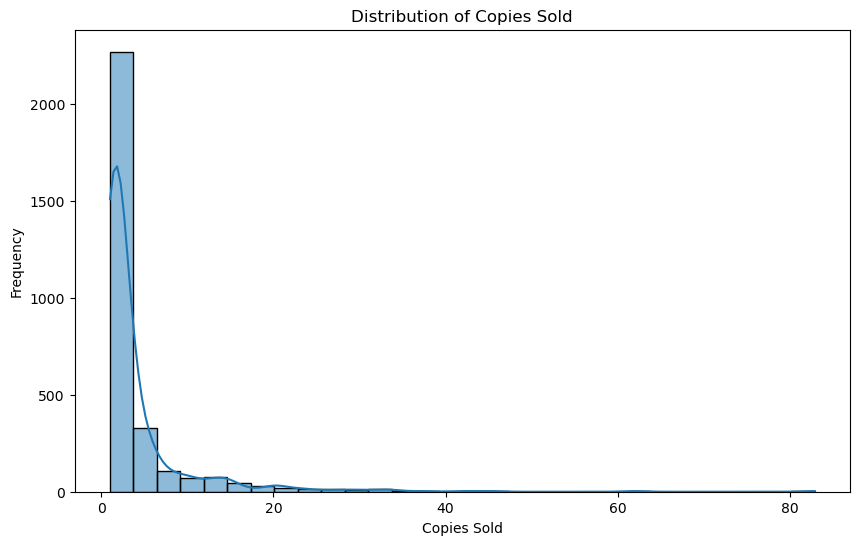

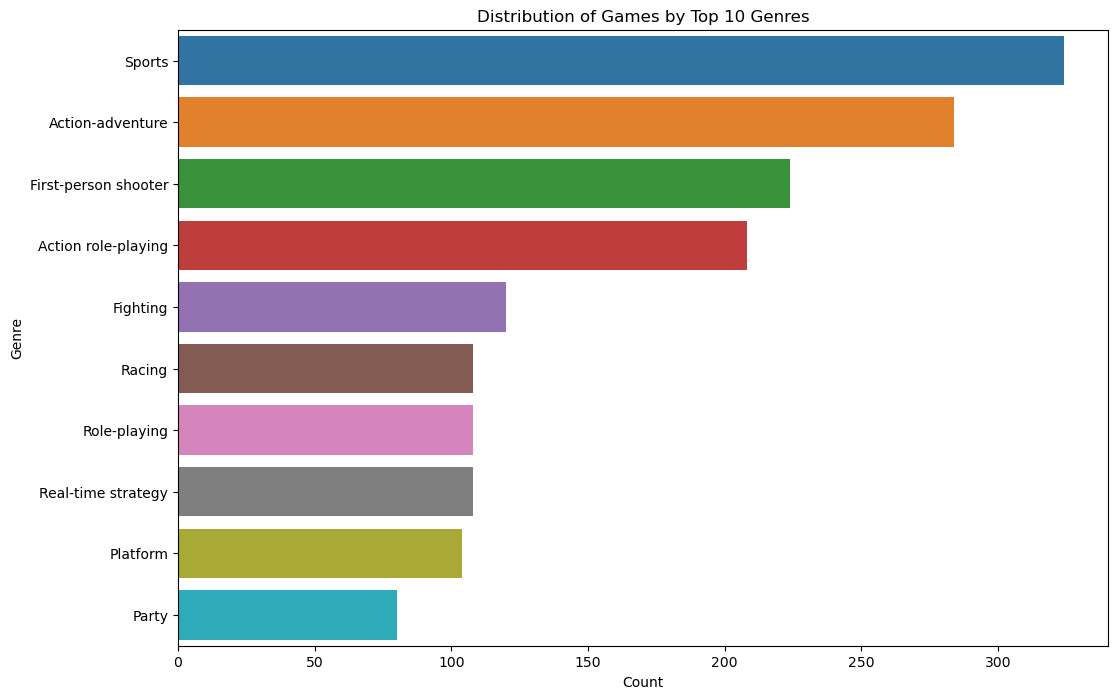

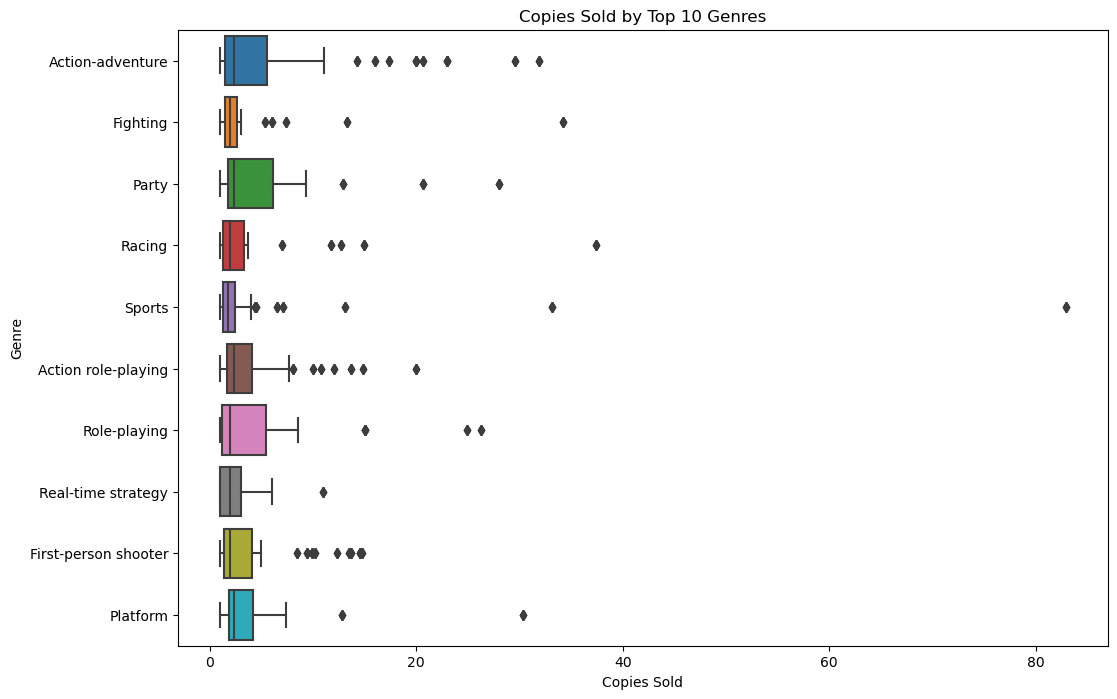

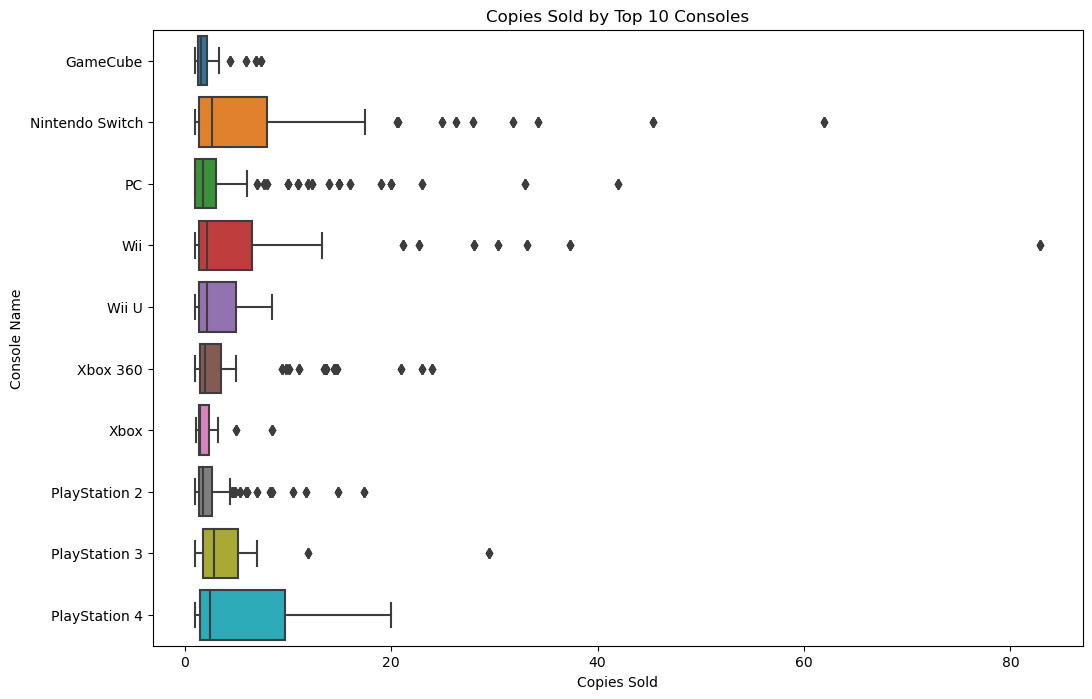

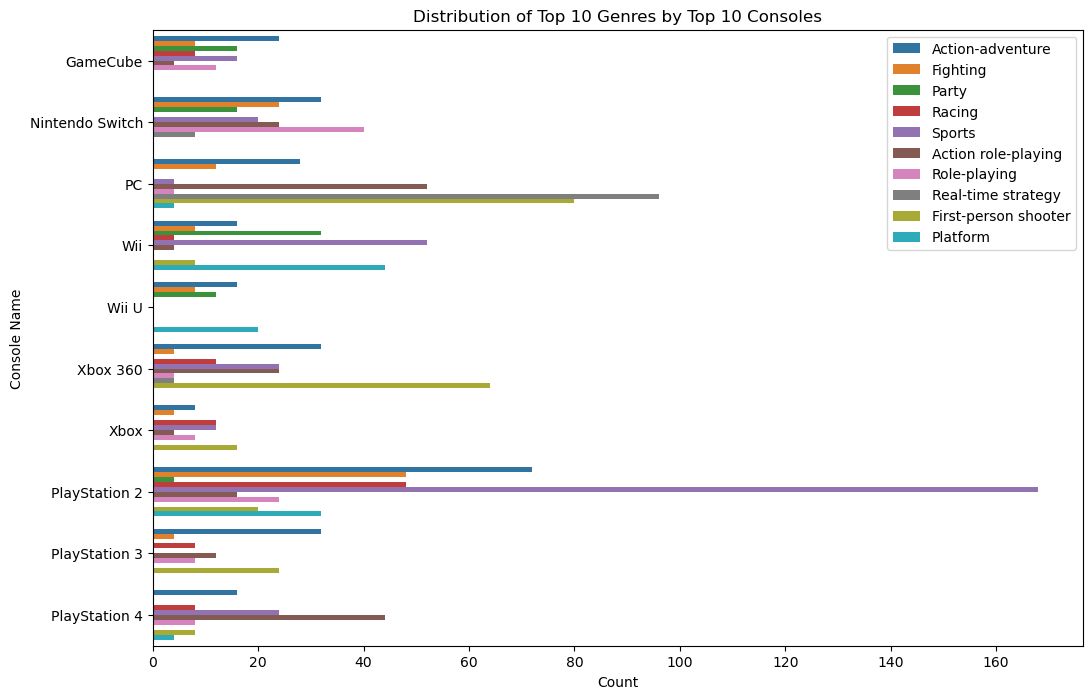

C:\Users\kn010\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kn010\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kn010\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


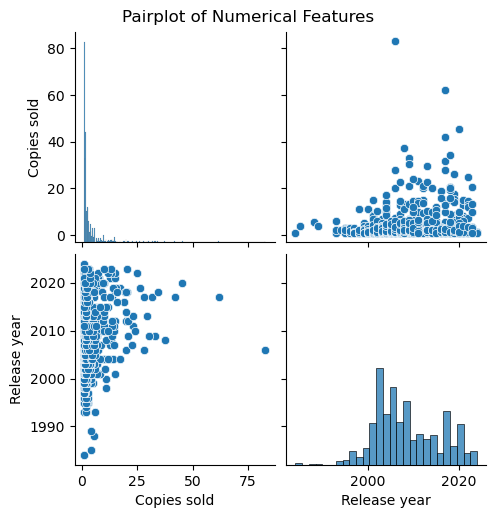

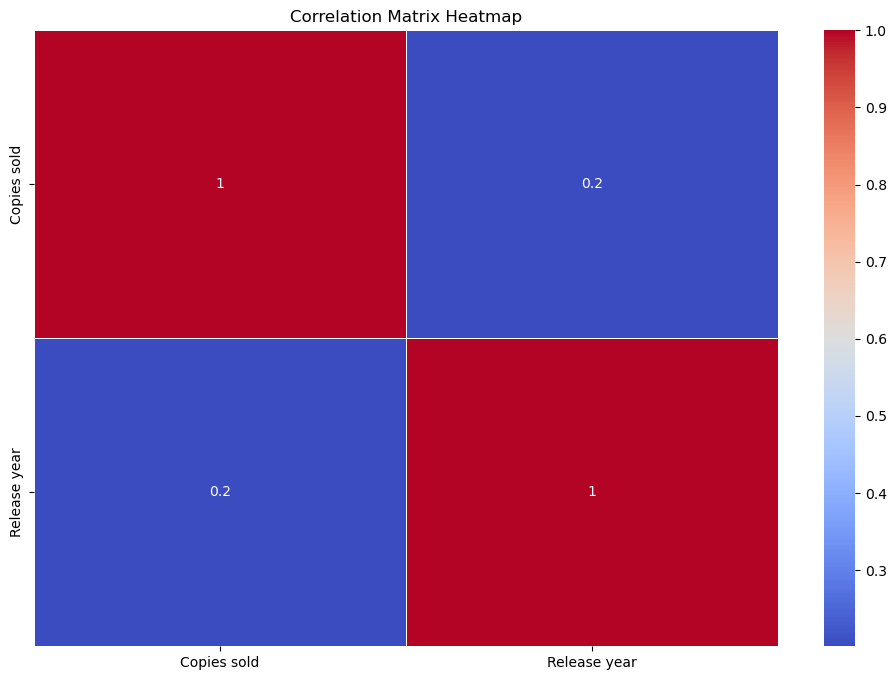

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined data
data = pd.read_csv(r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\combined_data.csv')

# Function to clean 'Copies sold' and convert to numeric
def clean_and_convert_copies_sold(df):
    df['Copies sold'] = df['Copies sold'].str.replace(' million', '', regex=False).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    return df

# Function to filter top N categories
def filter_top_n(df, column, n=10):
    top_n = df[column].value_counts().nlargest(n).index
    return df[df[column].isin(top_n)]

# Function to perform univariate analysis
def univariate_analysis(df):
    print("Summary Statistics:")
    print(df.describe(include='all'))
    
    # Distribution of Copies Sold
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Copies sold'], bins=30, kde=True)
    plt.title('Distribution of Copies Sold')
    plt.xlabel('Copies Sold')
    plt.ylabel('Frequency')
    plt.show()
    
    # Distribution of Games by Genre
    top_genres = filter_top_n(df, 'Genre')
    plt.figure(figsize=(12, 8))
    sns.countplot(y='Genre', data=top_genres, order=top_genres['Genre'].value_counts().index)
    plt.title('Distribution of Games by Top 10 Genres')
    plt.xlabel('Count')
    plt.ylabel('Genre')
    plt.show()

# Function to perform bivariate analysis
def bivariate_analysis(df):
    # Copies Sold vs Genre
    top_genres = filter_top_n(df, 'Genre')
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Copies sold', y='Genre', data=top_genres)
    plt.title('Copies Sold by Top 10 Genres')
    plt.xlabel('Copies Sold')
    plt.ylabel('Genre')
    plt.show()
    
    # Copies Sold vs Console Name
    top_consoles = filter_top_n(df, 'Console_name')
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Copies sold', y='Console_name', data=top_consoles)
    plt.title('Copies Sold by Top 10 Consoles')
    plt.xlabel('Copies Sold')
    plt.ylabel('Console Name')
    plt.show()
    
    # Genre vs Console Name
    top_genres_consoles = df[df['Genre'].isin(top_genres['Genre'].unique()) & df['Console_name'].isin(top_consoles['Console_name'].unique())]
    plt.figure(figsize=(12, 8))
    sns.countplot(y='Console_name', hue='Genre', data=top_genres_consoles)
    plt.title('Distribution of Top 10 Genres by Top 10 Consoles')
    plt.xlabel('Count')
    plt.ylabel('Console Name')
    plt.legend(loc='upper right')
    plt.show()

# Function to perform multivariate analysis
def multivariate_analysis(df):
    # Select numeric columns for correlation matrix
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Pairplot for numerical features
    sns.pairplot(numeric_df)
    plt.suptitle('Pairplot of Numerical Features', y=1.02)
    plt.show()
    
    # Heatmap for correlation matrix
    plt.figure(figsize=(12, 8))
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap')
    plt.show()

# Preprocessing steps before analysis
# Convert 'Copies sold' to numeric
data = clean_and_convert_copies_sold(data)
# Extract year from 'Release date'
data['Release year'] = pd.to_datetime(data['Release date'], errors='coerce').dt.year

# Perform analyses
univariate_analysis(data)
bivariate_analysis(data)
multivariate_analysis(data)

In [ ]:
## Data Visualization:
# Create a range of plots (histograms, boxplots, scatter plots, heatmaps).
# Use visualizations to uncover patterns and trends. 

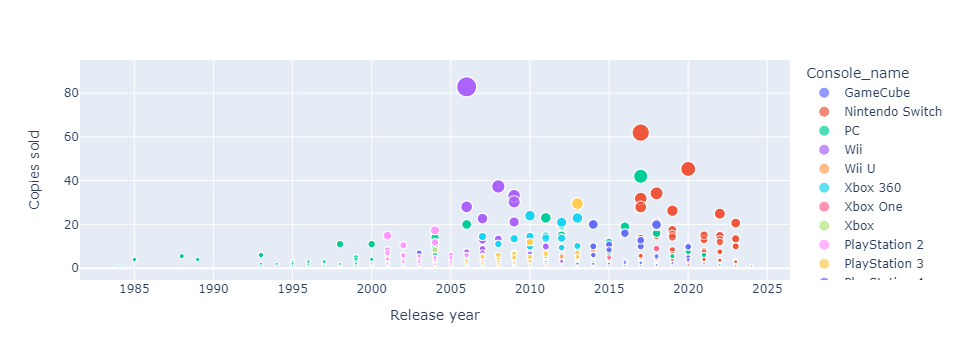

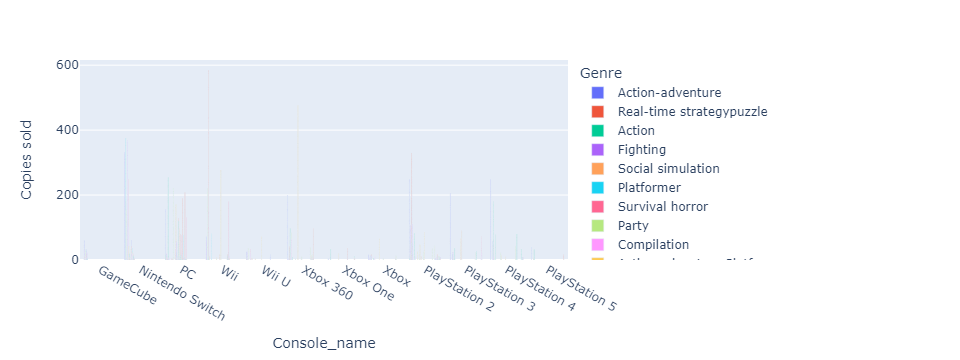

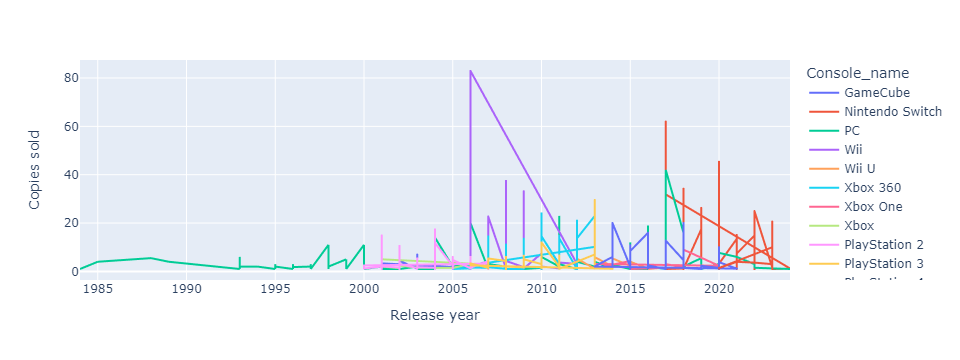

In [32]:
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(data, x='Release year', y='Copies sold', color='Console_name', size='Copies sold', hover_data=['Game'])
fig.show()

# Interactive bar plot
fig = px.bar(data, x='Console_name', y='Copies sold', color='Genre', barmode='group')
fig.show()

# Interactive line plot
fig = px.line(data, x='Release year', y='Copies sold', color='Console_name')
fig.show()

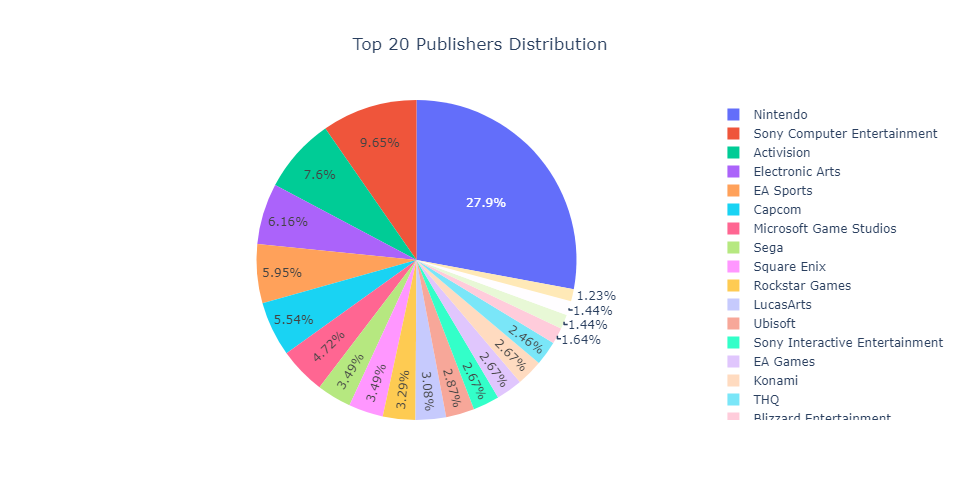

In [34]:
import plotly.express as px
import pandas as pd

# Assume `data` is the DataFrame you are working with

# Calculate the count of games per publisher
publisher_counts = data['Publisher'].value_counts().reset_index()
publisher_counts.columns = ['Publisher', 'Count']

# Get the top 20 publishers
top_20_publishers = publisher_counts.head(20)

# Create a pie chart for the top 20 publishers
fig_pie_publisher = px.pie(top_20_publishers, values='Count', names='Publisher', title='Top 20 Publishers Distribution')

# Adjust layout
fig_pie_publisher.update_layout(title={'x': 0.5, 'xanchor': 'center'},
                                height=500, width=800)

# Display the plot
fig_pie_publisher.show()

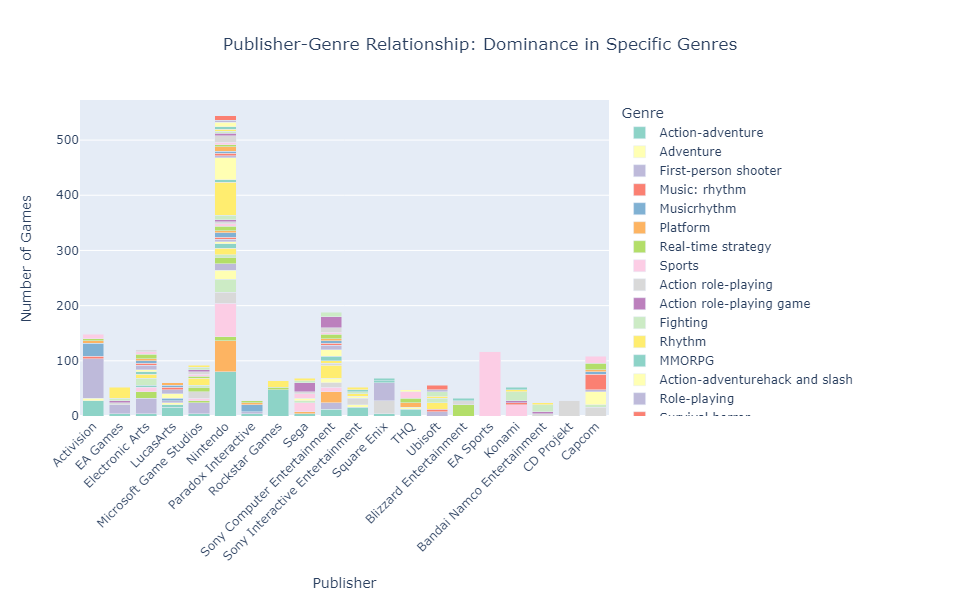

In [38]:
import plotly.express as px

# Group by Publisher and Genre and count the number of games
publisher_genre_counts = data.groupby(['Publisher', 'Genre']).size().reset_index(name='Count')

# Get the top 20 publishers by number of games
top_publishers = publisher_genre_counts.groupby('Publisher')['Count'].sum().nlargest(20).index
filtered_data = publisher_genre_counts[publisher_genre_counts['Publisher'].isin(top_publishers)]

# Create a stacked bar chart
fig_stacked_bar = px.bar(
    filtered_data,
    x='Publisher',
    y='Count',
    color='Genre',
    title='Publisher-Genre Relationship: Dominance in Specific Genres',
    labels={'Count': 'Number of Games'},
    color_discrete_sequence=px.colors.qualitative.Set3  # Using a consistent color palette
)

# Update Layout
fig_stacked_bar.update_layout(
    title={'x': 0.5, 'xanchor': 'center'},
    height=600,
    width=1000,
    barmode='stack',
    xaxis_title='Publisher',
    yaxis_title='Number of Games',
    xaxis_tickangle=-45  # Rotate x-axis labels for readability
)

# Display the plot
fig_stacked_bar.show()

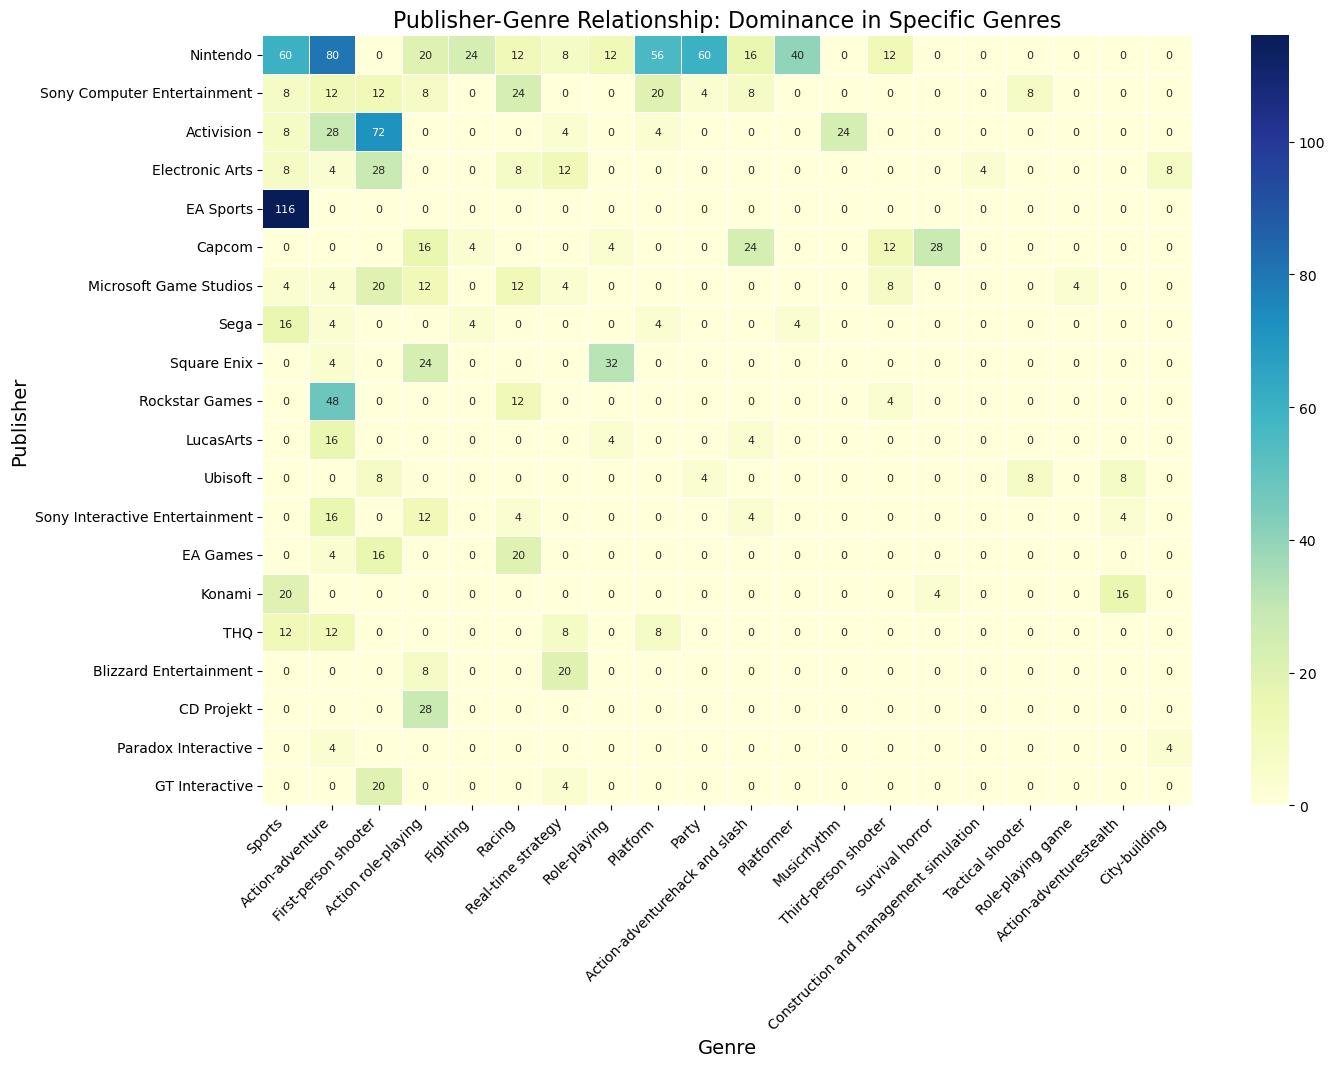

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a pivot table for publisher-genre relationship
pivot_table = data.pivot_table(index='Publisher', columns='Genre', aggfunc='size', fill_value=0)

# Get the top 20 publishers by the total number of games published
top_publishers = data['Publisher'].value_counts().nlargest(20).index

# Get the top 20 genres by the total number of games
top_genres = data['Genre'].value_counts().nlargest(20).index

# Filter the pivot table
filtered_pivot_table = pivot_table.loc[top_publishers, top_genres]

# Create a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(filtered_pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5, annot_kws={"size": 8})
plt.title('Publisher-Genre Relationship: Dominance in Specific Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Publisher', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()


C:\Users\kn010\AppData\Local\Temp\ipykernel_287344\2039085321.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kn010\AppData\Local\Temp\ipykernel_287344\2039085321.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



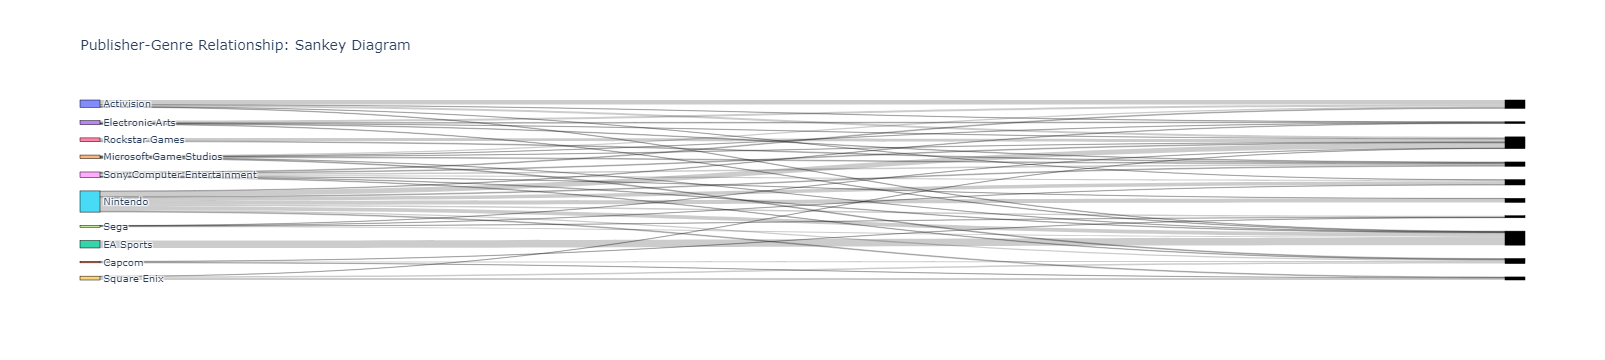

In [41]:
import plotly.graph_objects as go
import pandas as pd

# Group by Publisher and Genre and count the number of games
publisher_genre_counts = data.groupby(['Publisher', 'Genre']).size().reset_index(name='Count')

# Get the top 10 publishers by the total number of games published
top_publishers = data['Publisher'].value_counts().nlargest(10).index

# Get the top 10 genres by the total number of games
top_genres = data['Genre'].value_counts().nlargest(10).index

# Filter the publisher_genre_counts to include only top publishers and genres
filtered_publisher_genre_counts = publisher_genre_counts[publisher_genre_counts['Publisher'].isin(top_publishers) & publisher_genre_counts['Genre'].isin(top_genres)]

# Create labels
all_labels = list(filtered_publisher_genre_counts['Publisher'].unique()) + list(filtered_publisher_genre_counts['Genre'].unique())

# Create source and target indices
filtered_publisher_genre_counts['source'] = filtered_publisher_genre_counts['Publisher'].apply(lambda x: all_labels.index(x))
filtered_publisher_genre_counts['target'] = filtered_publisher_genre_counts['Genre'].apply(lambda x: all_labels.index(x) + len(filtered_publisher_genre_counts['Publisher'].unique()))

# Create the Sankey Diagram
fig_sankey = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels
    ),
    link=dict(
        source=filtered_publisher_genre_counts['source'],
        target=filtered_publisher_genre_counts['target'],
        value=filtered_publisher_genre_counts['Count']
    )
))

fig_sankey.update_layout(title_text="Publisher-Genre Relationship: Sankey Diagram", font_size=10)
fig_sankey.show()


In [ ]:
# Correlation and Relationships
# Sales Correlation: Explore the correlation between different sales regions.
# Factors Affecting Sales: Investigate factors such as game rating, platform, and genre on sales.

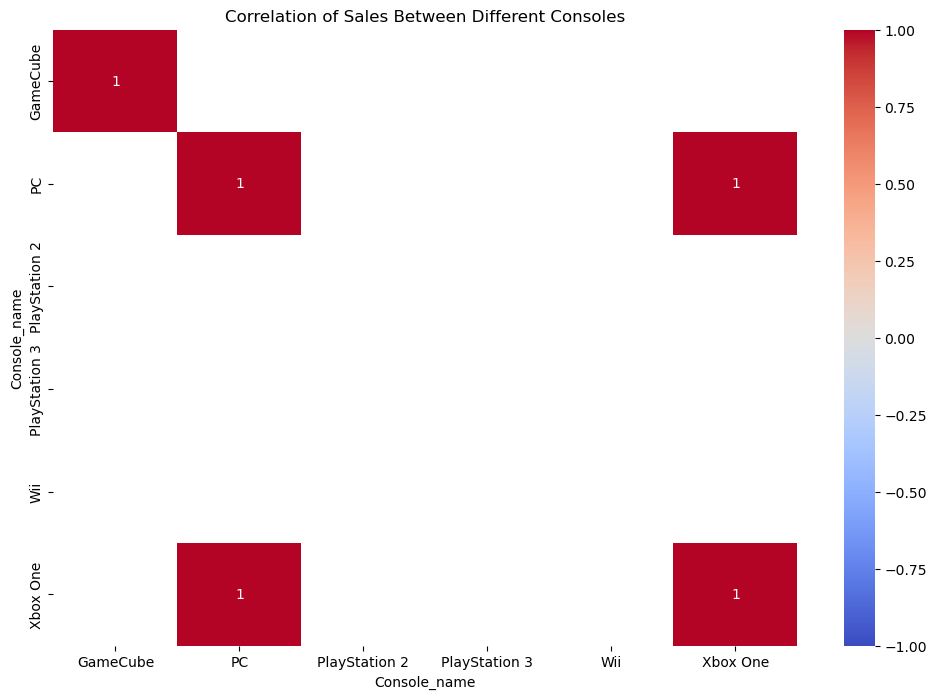

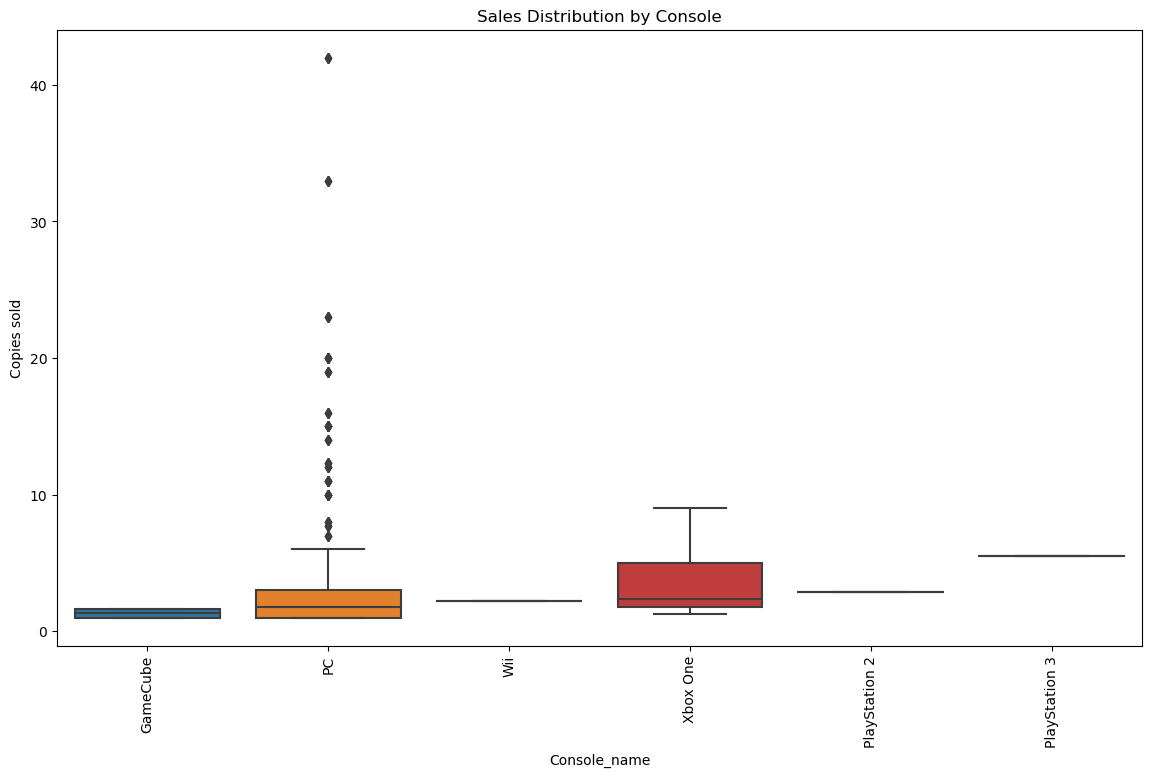

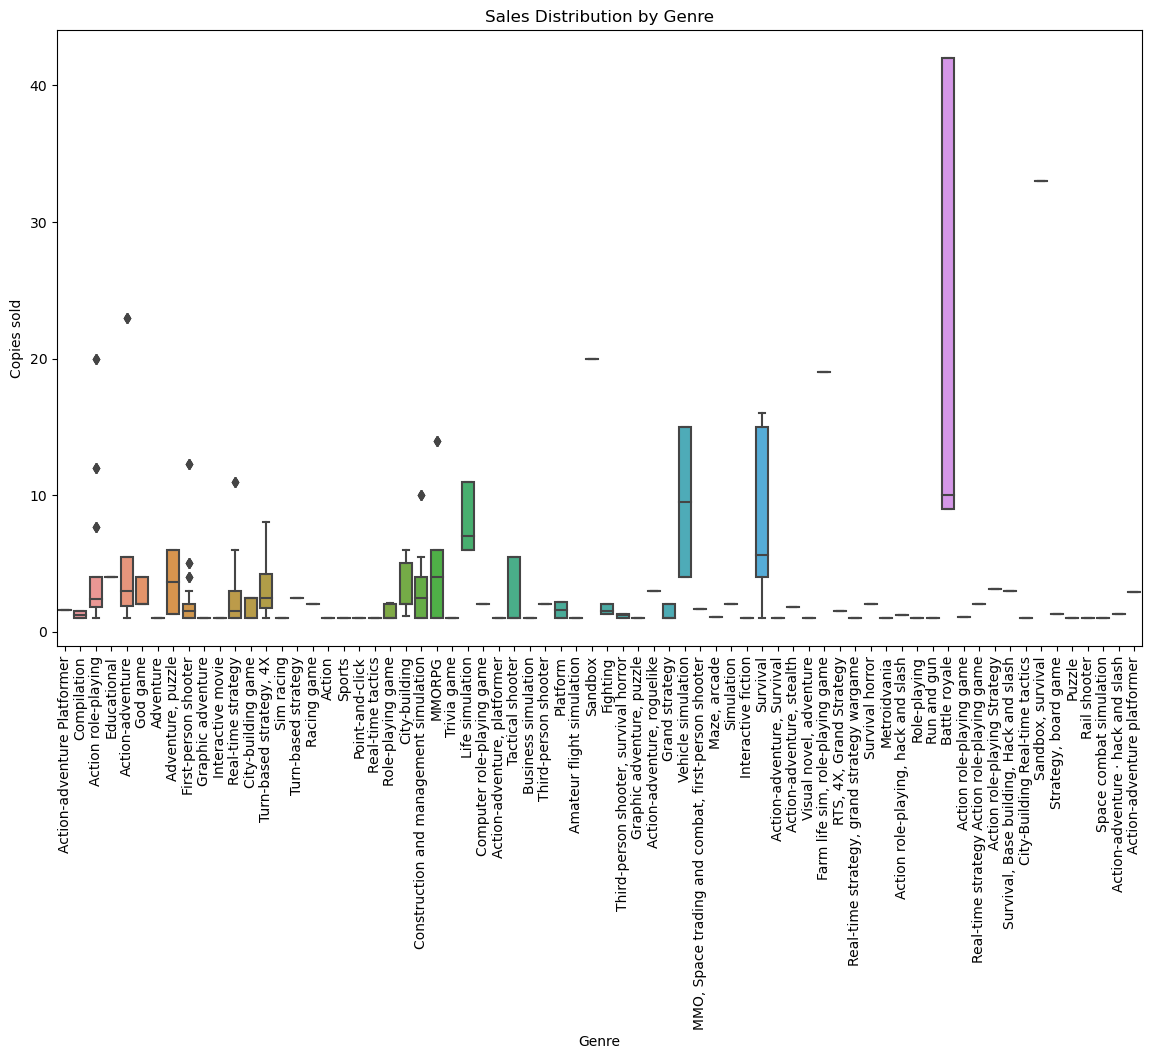

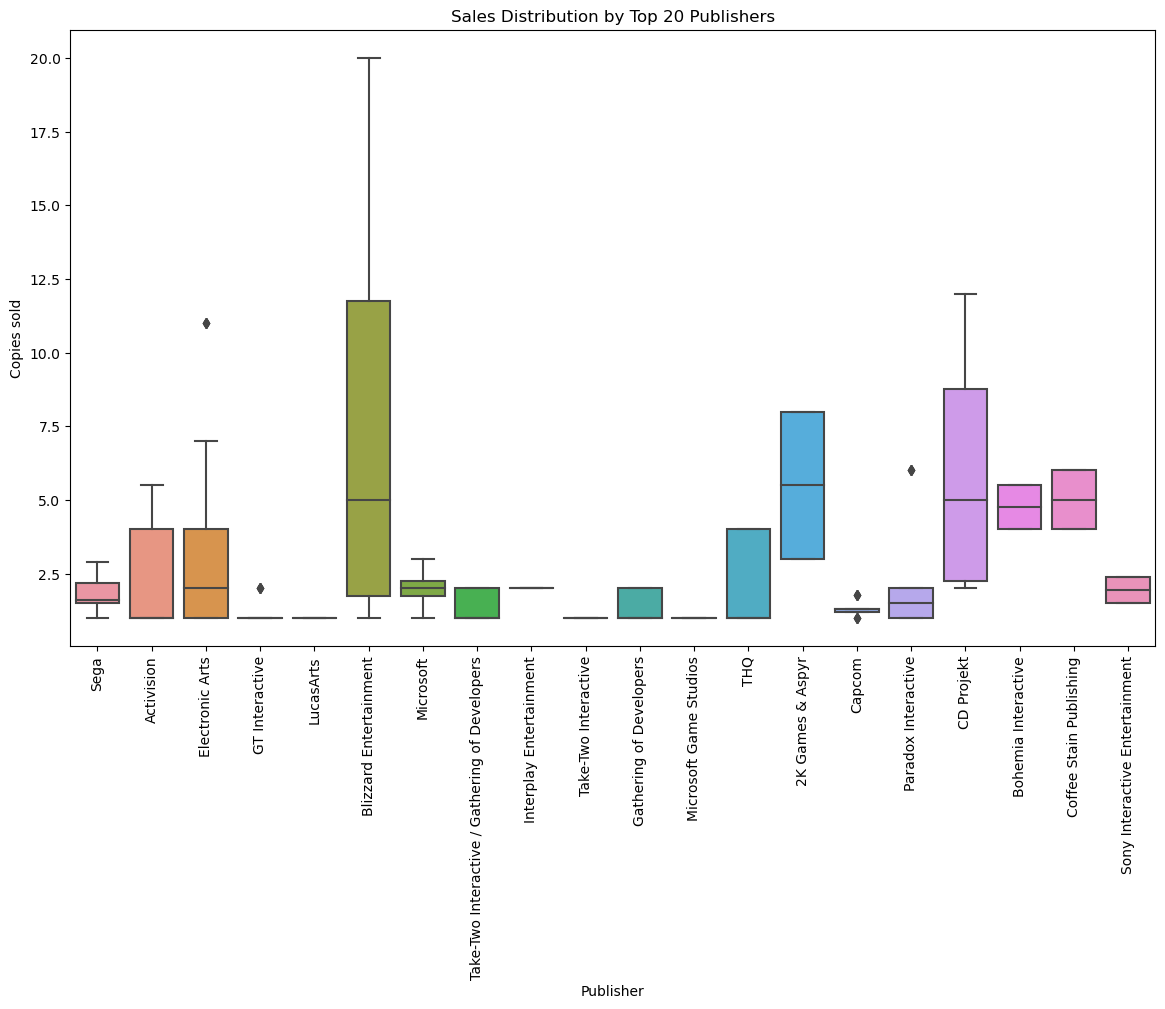

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
file_path = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\combined_data.csv'
data = pd.read_csv(file_path)

# Clean and convert 'Copies sold' to numeric
data['Copies sold'] = data['Copies sold'].replace({' million': '', ',': '', '\xa0': ''}, regex=True)
data['Copies sold'] = pd.to_numeric(data['Copies sold'], errors='coerce')

# Drop rows with NaN values in 'Copies sold'
data = data.dropna(subset=['Copies sold'])

# 1. Sales Correlations: Explore the correlation between different sales between consoles
# Create a pivot table with consoles as columns and games as rows
pivot_table = data.pivot_table(index='Game', columns='Console_name', values='Copies sold', aggfunc='sum')
correlation_matrix = pivot_table.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Sales Between Different Consoles')
plt.show()

# 2. Factors Affecting Sales: Investigate the factors such as consoles, genres, and publishers

# Plot sales distribution by console
plt.figure(figsize=(14, 8))
sns.boxplot(x='Console_name', y='Copies sold', data=data)
plt.xticks(rotation=90)
plt.title('Sales Distribution by Console')
plt.show()

# Plot sales distribution by genre
plt.figure(figsize=(14, 8))
sns.boxplot(x='Genre', y='Copies sold', data=data)
plt.xticks(rotation=90)
plt.title('Sales Distribution by Genre')
plt.show()

# Plot sales distribution by publisher
plt.figure(figsize=(14, 8))
top_publishers = data['Publisher'].value_counts().index[:20]  # Select top 20 publishers
filtered_data = data[data['Publisher'].isin(top_publishers)]
sns.boxplot(x='Publisher', y='Copies sold', data=filtered_data)
plt.xticks(rotation=90)
plt.title('Sales Distribution by Top 20 Publishers')
plt.show()


In [ ]:
## Feature Engineering:
# Create new features based on existing data to improve the predictive model.
# Transform variables as needed.

In [48]:
import pandas as pd
import numpy as np

# Load the CSV file
file_path = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\combined_data.csv'
data = pd.read_csv(file_path)

# Clean and convert 'Copies sold' to numeric
data['Copies sold'] = data['Copies sold'].replace({' million': '', ',': '', '\xa0': ''}, regex=True)
data['Copies sold'] = pd.to_numeric(data['Copies sold'], errors='coerce')

# Drop rows with NaN values in 'Copies sold'
data = data.dropna(subset=['Copies sold'])

# Feature Engineering
# 1. Extract Year and Month of Release
data['Release date'] = pd.to_datetime(data['Release date'], errors='coerce')
data['Release Year'] = data['Release date'].dt.year
data['Release Month'] = data['Release date'].dt.month

# 2. Sales in Millions
data['Sales in Millions'] = data['Copies sold']

# 3. Is Franchise (example for a simple implementation, customize based on your franchises)
franchise_keywords = ['Mario', 'Zelda', 'Final Fantasy', 'Pokemon', 'Call of Duty']
data['Is Franchise'] = data['Game'].apply(lambda x: 1 if any(keyword in x for keyword in franchise_keywords) else 0)

# 4. Publisher Popularity
publisher_sales = data.groupby('Publisher')['Copies sold'].transform('sum')
data['Publisher Popularity'] = publisher_sales

# 5. Log Transform of Sales
data['Log Copies Sold'] = np.log1p(data['Copies sold'])

# 6. Encoding Categorical Variables
data = pd.get_dummies(data, columns=['Console_name', 'Genre', 'Publisher'], drop_first=True)

# Drop original columns that are not needed anymore
data = data.drop(columns=['Release date', 'Copies sold', 'Game'])

# Display the first few rows of the new dataframe to inspect the changes
print(data.head())

                                 Developer  Release Year  Release Month  \
15                              Sonic Team        2003.0            6.0   
33                              Sonic Team        2005.0            8.0   
130  Technology and Entertainment Software        1984.0           12.0   
131                             Broderbund        1985.0            6.0   
132                               System 3        1988.0            8.0   

     Sales in Millions  Is Franchise  Publisher Popularity  Log Copies Sold  \
15                 1.6             0                 36.72         0.955511   
33                 1.0             0                 36.72         0.693147   
130                1.0             0                  4.00         0.693147   
131                4.0             0                 16.00         1.609438   
132                5.5             0                 54.00         1.871802   

     Console_name_PC  Console_name_PlayStation 2  Console_name_PlayStation

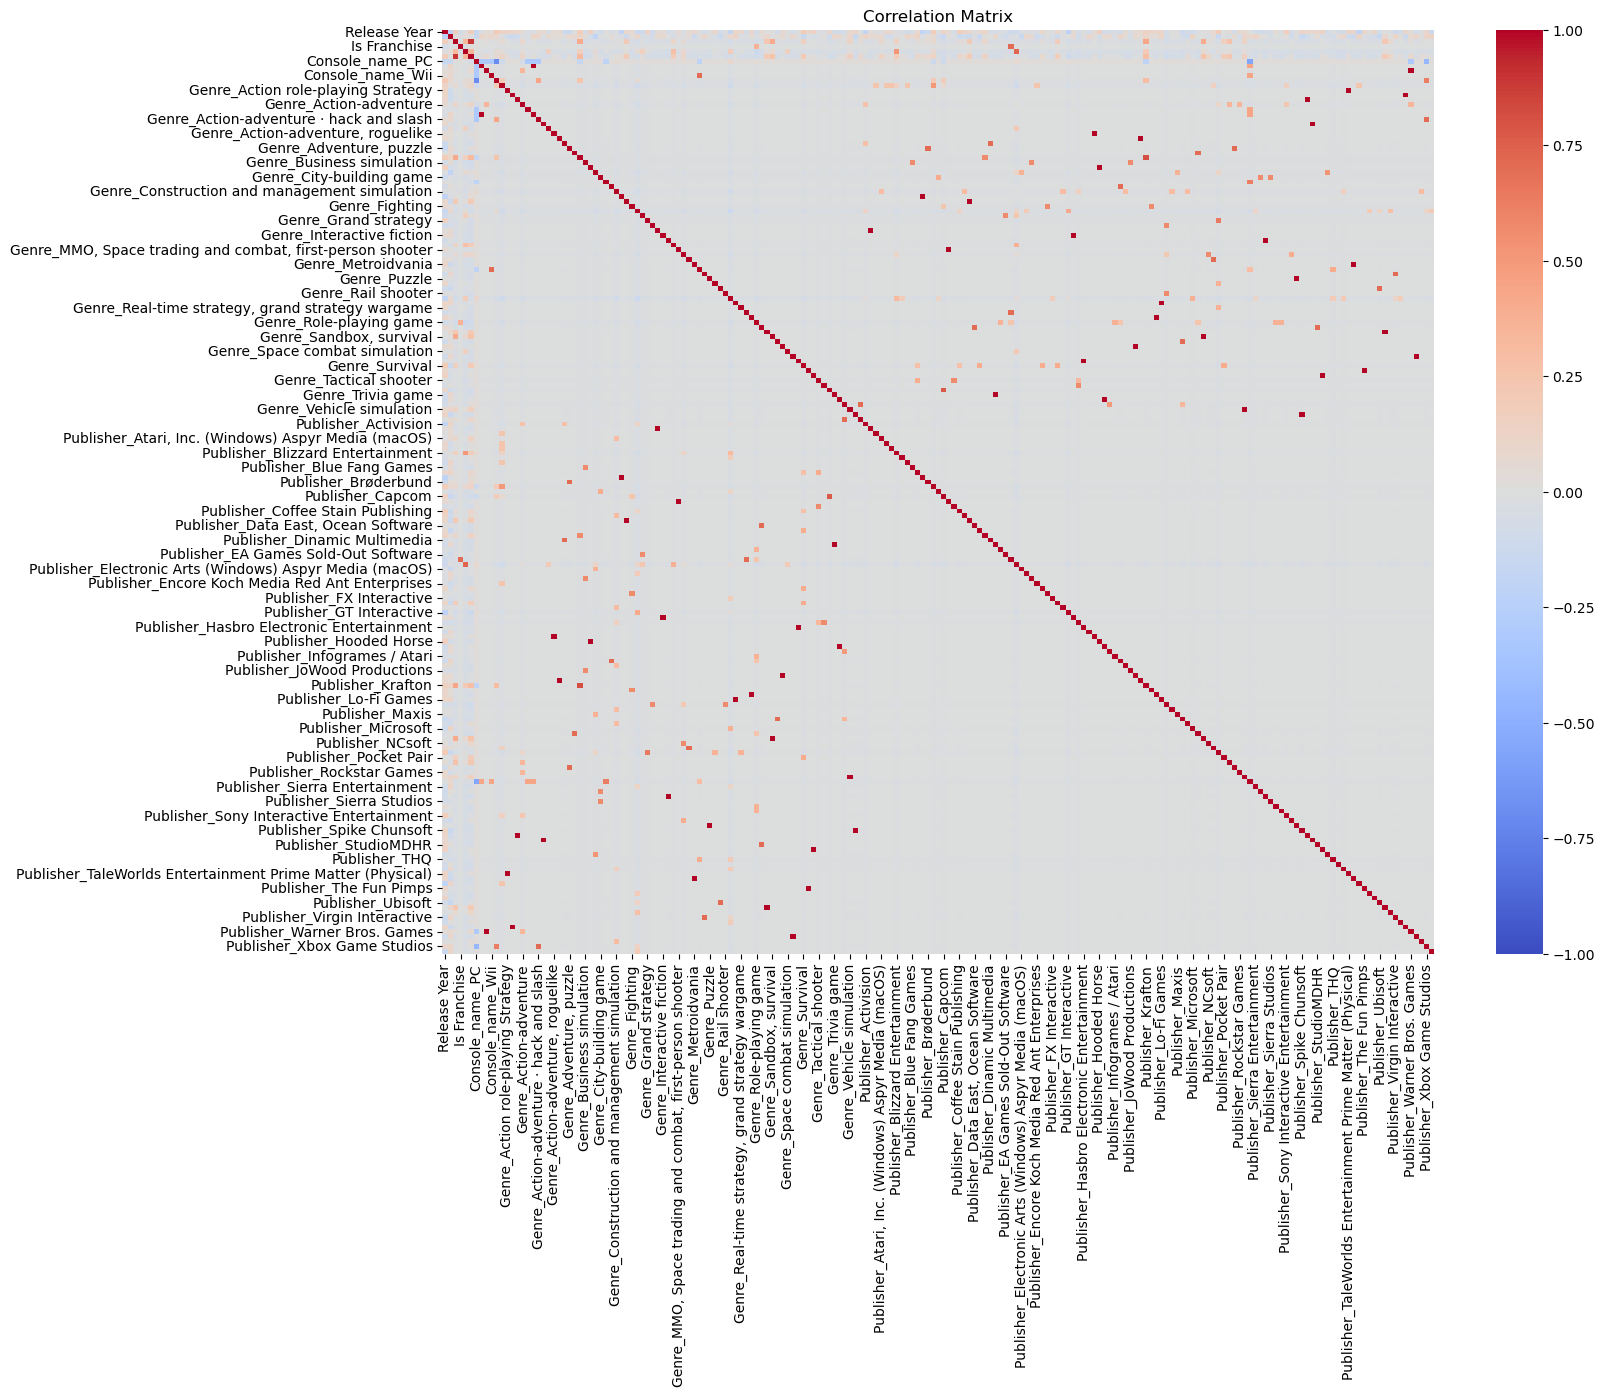

Mean Squared Error: 0.007790116826142587


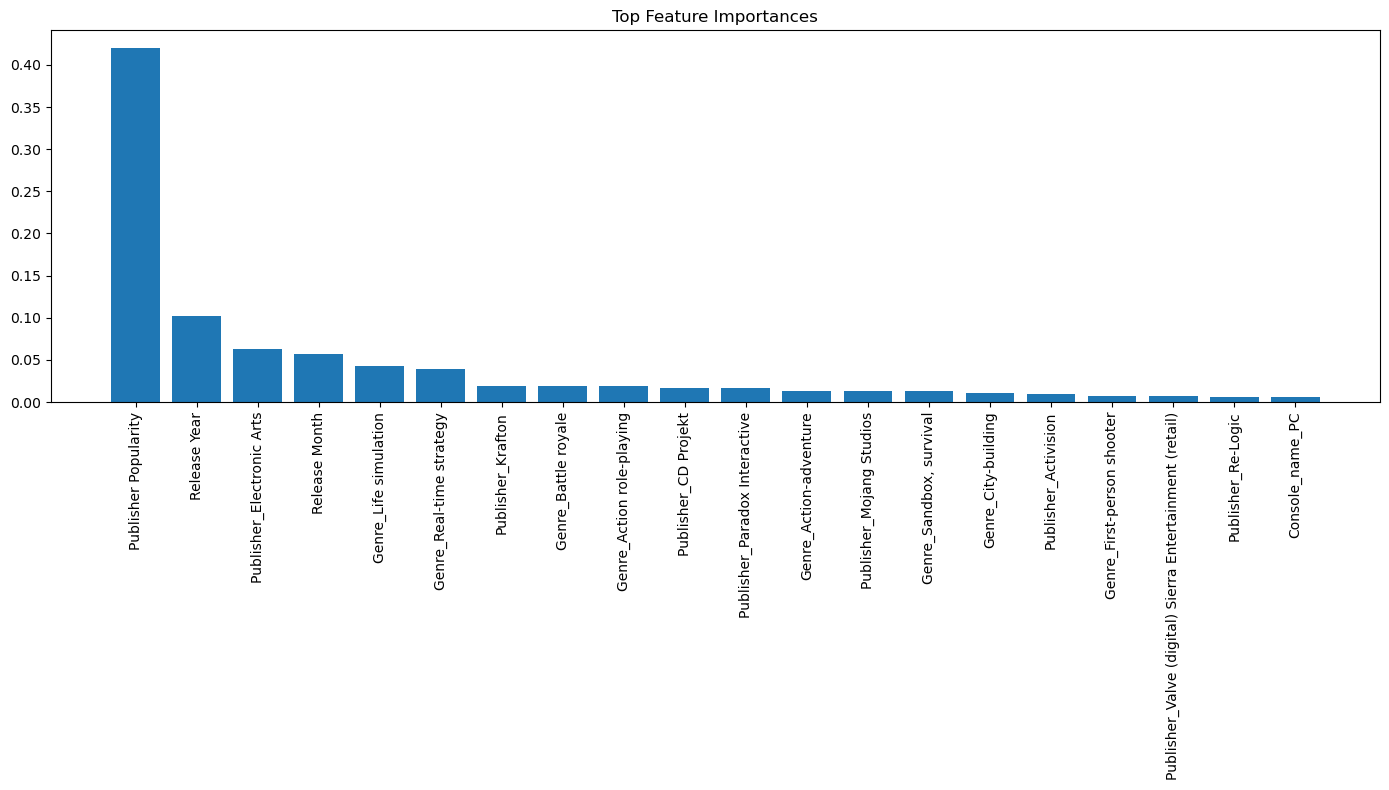

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Load the CSV file
file_path = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\combined_data.csv'
data = pd.read_csv(file_path)

# Clean and convert 'Copies sold' to numeric
data['Copies sold'] = data['Copies sold'].replace({' million': '', ',': '', '\xa0': ''}, regex=True)
data['Copies sold'] = pd.to_numeric(data['Copies sold'], errors='coerce')

# Drop rows with NaN values in 'Copies sold'
data = data.dropna(subset=['Copies sold'])

# Feature Engineering
data['Release date'] = pd.to_datetime(data['Release date'], errors='coerce')
data['Release Year'] = data['Release date'].dt.year
data['Release Month'] = data['Release date'].dt.month
data['Sales in Millions'] = data['Copies sold']
franchise_keywords = ['Mario', 'Zelda', 'Final Fantasy', 'Pokemon', 'Call of Duty']
data['Is Franchise'] = data['Game'].apply(lambda x: 1 if any(keyword in x for keyword in franchise_keywords) else 0)
publisher_sales = data.groupby('Publisher')['Copies sold'].transform('sum')
data['Publisher Popularity'] = publisher_sales
data['Log Copies Sold'] = np.log1p(data['Copies sold'])
data = pd.get_dummies(data, columns=['Console_name', 'Genre', 'Publisher'], drop_first=True)

# Drop columns that cannot be used in correlation or modeling
data = data.drop(columns=['Release date', 'Copies sold', 'Game', 'Developer'])

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Correlation Analysis
plt.figure(figsize=(16, 12))
correlation_matrix = data_imputed.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Prepare data for predictive modeling
X = data_imputed.drop(columns=['Log Copies Sold', 'Sales in Millions'])
y = data_imputed['Log Copies Sold']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot top feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Select top 20 features for better readability
top_n = 20
top_indices = indices[:top_n]
top_importances = importances[top_indices]
top_features = features[top_indices]

plt.figure(figsize=(14, 8))
plt.title('Top Feature Importances')
plt.bar(range(top_n), top_importances, align='center')
plt.xticks(range(top_n), top_features, rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
### Model Training and Deployment:
""Split the data into training and testing sets.
  Train the predictive model (e.g., Linear Regression, Random Forest, etc.).
  Deploy the model on a server, ensuring it can handle new input data and provide predictions.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import pickle

# Load the CSV file
file_path = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\combined_data.csv'
data = pd.read_csv(file_path)

# Clean and convert 'Copies sold' to numeric
data['Copies sold'] = data['Copies sold'].replace({' million': '', ',': '', '\xa0': ''}, regex=True)
data['Copies sold'] = pd.to_numeric(data['Copies sold'], errors='coerce')

# Drop rows with NaN values in 'Copies sold'
data = data.dropna(subset=['Copies sold'])

# Feature Engineering
data['Release date'] = pd.to_datetime(data['Release date'], errors='coerce')
data['Release Year'] = data['Release date'].dt.year
data['Release Month'] = data['Release date'].dt.month
data['Sales in Millions'] = data['Copies sold']
franchise_keywords = ['Mario', 'Zelda', 'Final Fantasy', 'Pokemon', 'Call of Duty']
data['Is Franchise'] = data['Game'].apply(lambda x: 1 if any(keyword in x for keyword in franchise_keywords) else 0)
publisher_sales = data.groupby('Publisher')['Copies sold'].transform('sum')
data['Publisher Popularity'] = publisher_sales
data['Log Copies Sold'] = np.log1p(data['Copies sold'])
data = pd.get_dummies(data, columns=['Console_name', 'Genre', 'Publisher'], drop_first=True)

# Drop columns that cannot be used in correlation or modeling
data = data.drop(columns=['Release date', 'Copies sold', 'Game', 'Developer'])

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Prepare data for predictive modeling
X = data_imputed.drop(columns=['Log Copies Sold', 'Sales in Millions'])
y = data_imputed['Log Copies Sold']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
print(f'Linear Regression Mean Squared Error: {lr_mse}')

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print(f'Random Forest Mean Squared Error: {rf_mse}')

# Save the Random Forest model (assuming it's the better model)
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

Linear Regression Mean Squared Error: 0.08469454441590471
Random Forest Mean Squared Error: 0.007790116826142587


Linear Regression Mean Squared Error: 0.08469454441590471
Linear Regression R-squared: 0.7852415105380881
Linear Regression Adjusted R-squared: 0.7173663357750424


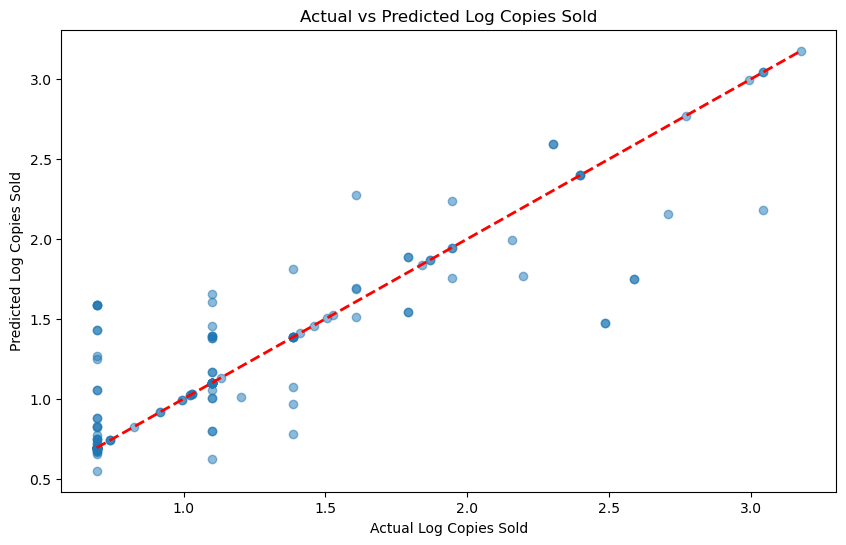

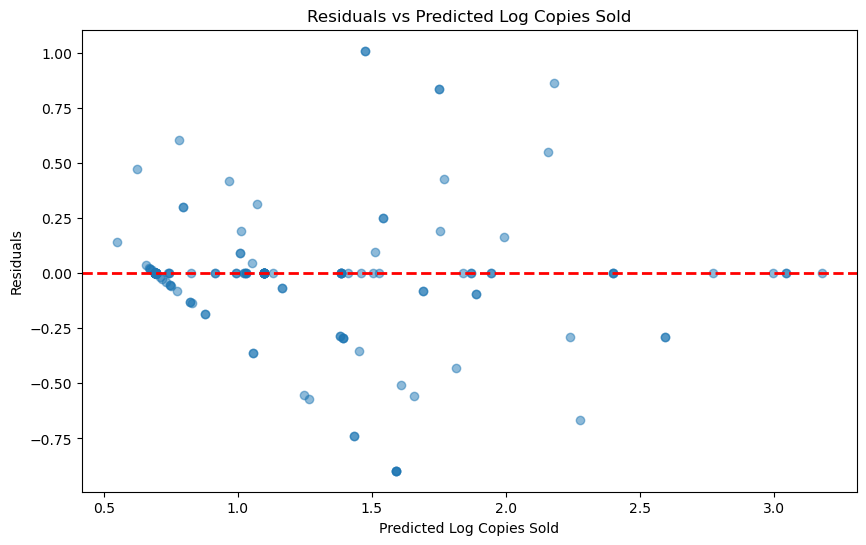

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the CSV file
file_path = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\combined_data.csv'
data = pd.read_csv(file_path)

# Clean and convert 'Copies sold' to numeric
data['Copies sold'] = data['Copies sold'].replace({' million': '', ',': '', '\xa0': ''}, regex=True)
data['Copies sold'] = pd.to_numeric(data['Copies sold'], errors='coerce')

# Drop rows with NaN values in 'Copies sold'
data = data.dropna(subset=['Copies sold'])

# Feature Engineering
data['Release date'] = pd.to_datetime(data['Release date'], errors='coerce')
data['Release Year'] = data['Release date'].dt.year
data['Release Month'] = data['Release date'].dt.month
data['Sales in Millions'] = data['Copies sold']

franchise_keywords = ['Mario', 'Zelda', 'Final Fantasy', 'Pokemon', 'Call of Duty']
data['Is Franchise'] = data['Game'].apply(lambda x: 1 if any(keyword in x for keyword in franchise_keywords) else 0)

publisher_sales = data.groupby('Publisher')['Copies sold'].transform('sum')
data['Publisher Popularity'] = publisher_sales

data['Log Copies Sold'] = np.log1p(data['Copies sold'])

# Encoding Categorical Variables
data = pd.get_dummies(data, columns=['Console_name', 'Genre', 'Publisher'], drop_first=True)

# Drop columns that cannot be used in correlation or modeling
data = data.drop(columns=['Release date', 'Copies sold', 'Game', 'Developer'])

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Prepare data for predictive modeling
X = data_imputed.drop(columns=['Log Copies Sold', 'Sales in Millions'])
y = data_imputed['Log Copies Sold']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)
lr_adj_r2 = 1 - (1 - lr_r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print(f"Linear Regression Mean Squared Error: {lr_mse}")
print(f"Linear Regression R-squared: {lr_r2}")
print(f"Linear Regression Adjusted R-squared: {lr_adj_r2}")

# Plotting Residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Log Copies Sold')
plt.ylabel('Predicted Log Copies Sold')
plt.title('Actual vs Predicted Log Copies Sold')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Log Copies Sold')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Log Copies Sold')
plt.show()

# Save the Linear Regression model
import pickle
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

In [56]:
from flask import Flask, request, jsonify
import pandas as pd
import numpy as np
import pickle

app = Flask(__name__)

# Load the trained model
with open('rf_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Define a route for the default URL, which loads the form
@app.route('/')
def form():
    return """
        <form action="/predict" method="post">
            <label for="features">Input Features:</label><br><br>
            <textarea id="features" name="features" rows="10" cols="50"></textarea><br><br>
            <input type="submit" value="Predict">
        </form>
    """

# Define a route for the API that will process the prediction
@app.route('/predict', methods=['POST'])
def predict():
    # Parse input features
    input_features = request.form['features']
    input_data = [list(map(float, feature.split(','))) for feature in input_features.split('\n') if feature]

    # Convert input data to DataFrame
    columns = ['Release Year', 'Release Month', 'Is Franchise', 'Publisher Popularity'] + \
              [f'Console_name_{col}' for col in X.columns if 'Console_name' in col] + \
              [f'Genre_{col}' for col in X.columns if 'Genre' in col] + \
              [f'Publisher_{col}' for col in X.columns if 'Publisher' in col]

    input_df = pd.DataFrame(input_data, columns=columns)

    # Impute missing values
    input_df_imputed = pd.DataFrame(imputer.transform(input_df), columns=input_df.columns)

    # Predict using the trained model
    predictions = model.predict(input_df_imputed)
    
    # Return the predictions as JSON
    return jsonify({'predictions': predictions.tolist()})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\kn010\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



Random Forest Mean Squared Error: 0.007790116826142587
Random Forest Root Mean Squared Error: 0.08826163847415584
Random Forest Mean Absolute Error: 0.04282140733375653
Random Forest R-squared: 0.9802467356799426
Random Forest Adjusted R-squared: 0.9740036471239378


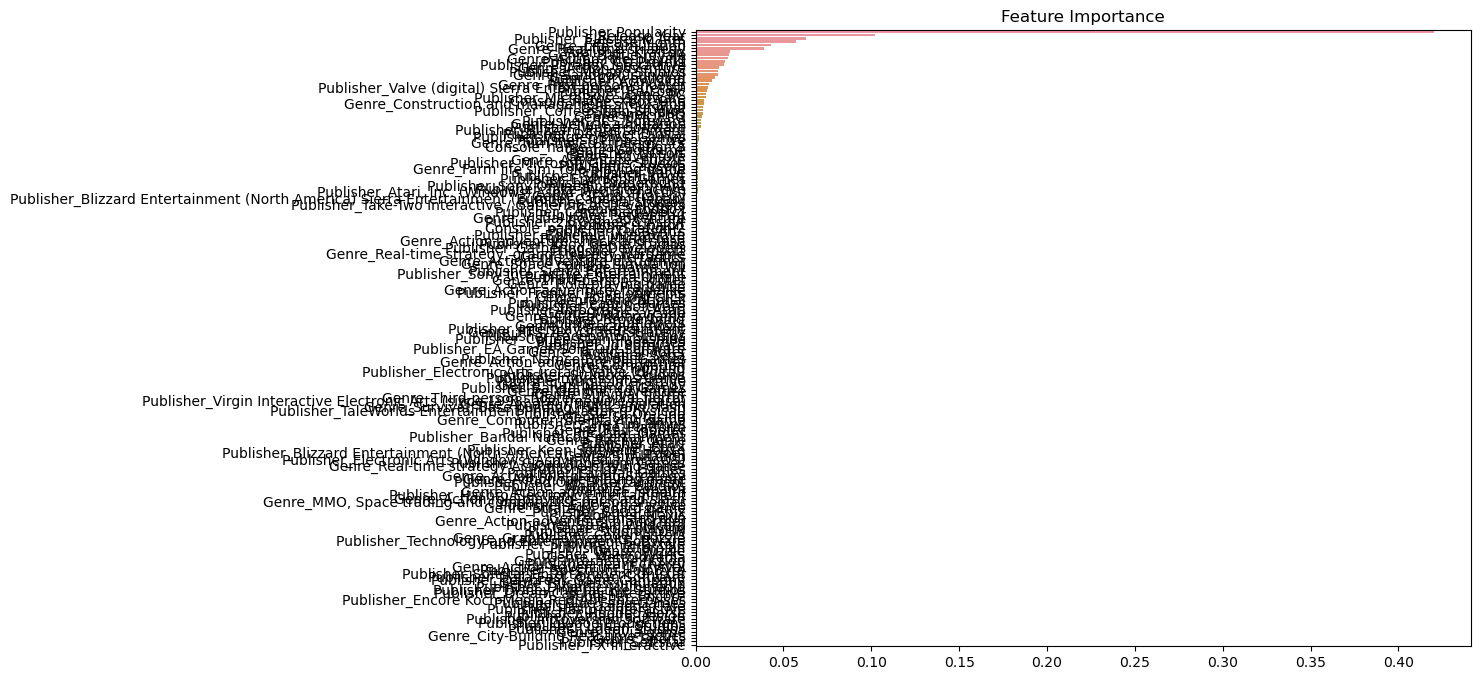

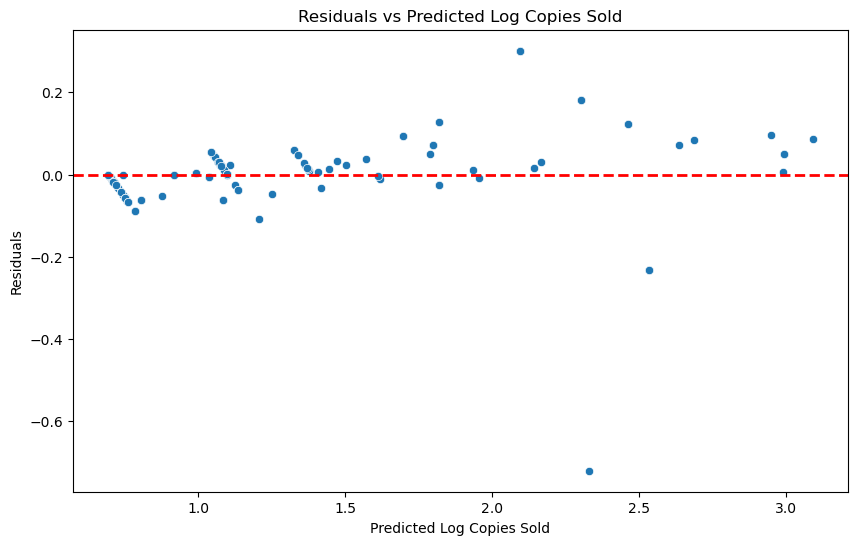

       Release Year  Release Month  Sales in Millions  Is Franchise  \
count    788.000000     788.000000         788.000000    788.000000   
mean    2006.276243       7.116022           3.386853      0.005076   
std        8.021631       3.116186           5.141434      0.071111   
min     1984.000000       1.000000           1.000000      0.000000   
25%     2000.000000       5.000000           1.000000      0.000000   
50%     2006.000000       7.116022           2.000000      0.000000   
75%     2013.000000      10.000000           3.000000      0.000000   
max     2024.000000      12.000000          42.000000      1.000000   

       Publisher Popularity  Log Copies Sold  Console_name_PC  \
count            788.000000       788.000000       788.000000   
mean              52.995330         1.187554         0.949239   
std               73.232932         0.641921         0.219650   
min                4.000000         0.693147         0.000000   
25%                8.000000        

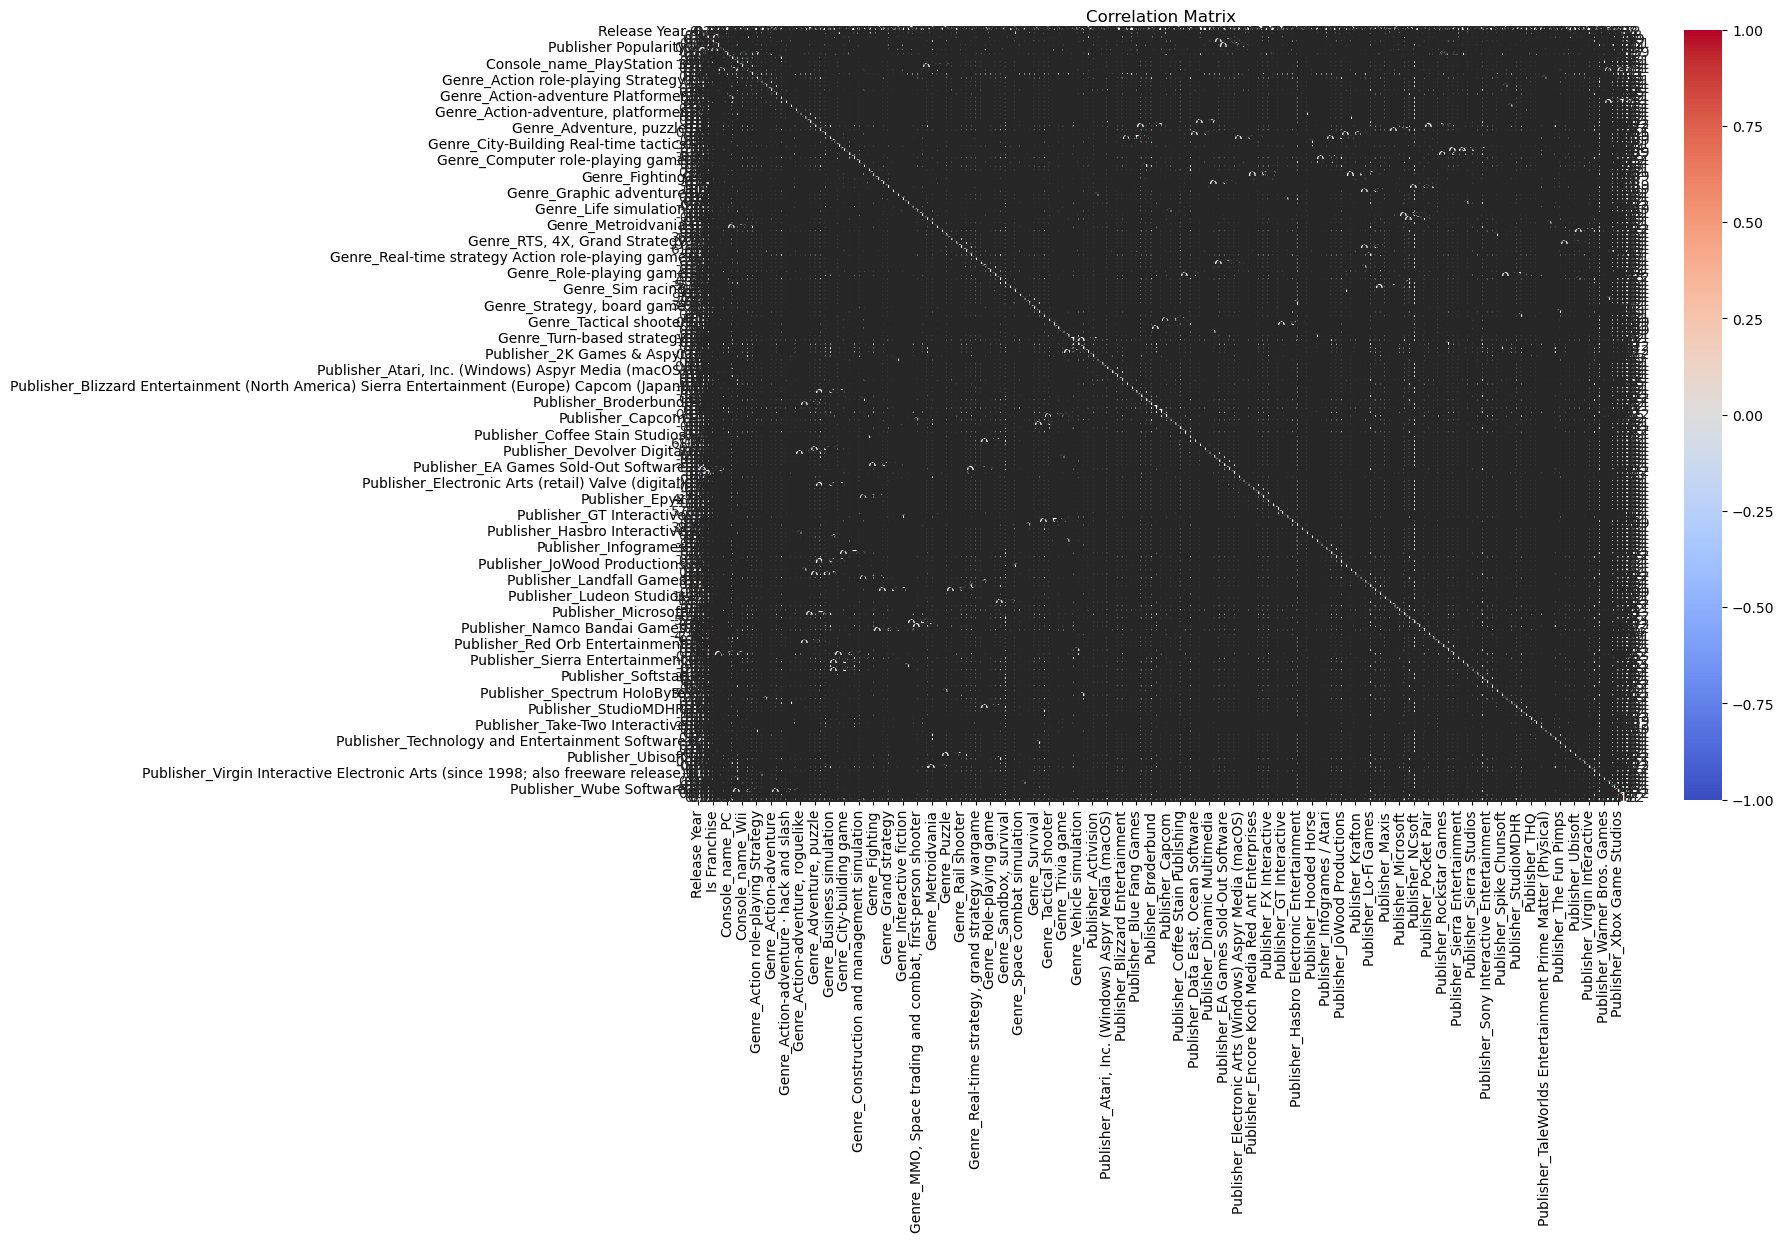

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\kn010\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3534: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



In [59]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from flask import Flask, request, jsonify
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Load the CSV file
file_path = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\combined_data.csv'
data = pd.read_csv(file_path)

# Clean and convert 'Copies sold' to numeric
data['Copies sold'] = data['Copies sold'].replace({' million': '', ',': '', '\xa0': ''}, regex=True)
data['Copies sold'] = pd.to_numeric(data['Copies sold'], errors='coerce')

# Drop rows with NaN values in 'Copies sold'
data = data.dropna(subset=['Copies sold'])

# Feature Engineering
data['Release date'] = pd.to_datetime(data['Release date'], errors='coerce')
data['Release Year'] = data['Release date'].dt.year
data['Release Month'] = data['Release date'].dt.month
data['Sales in Millions'] = data['Copies sold']

franchise_keywords = ['Mario', 'Zelda', 'Final Fantasy', 'Pokemon', 'Call of Duty']
data['Is Franchise'] = data['Game'].apply(lambda x: 1 if any(keyword in x for keyword in franchise_keywords) else 0)

publisher_sales = data.groupby('Publisher')['Copies sold'].transform('sum')
data['Publisher Popularity'] = publisher_sales

data['Log Copies Sold'] = np.log1p(data['Copies sold'])

# Encoding Categorical Variables
data = pd.get_dummies(data, columns=['Console_name', 'Genre', 'Publisher'], drop_first=True)

# Drop columns that cannot be used in correlation or modeling
data = data.drop(columns=['Release date', 'Copies sold', 'Game', 'Developer'])

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Prepare data for predictive modeling
X = data_imputed.drop(columns=['Log Copies Sold', 'Sales in Millions'])
y = data_imputed['Log Copies Sold']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_adj_r2 = 1 - (1 - rf_r2) * (len(y) - 1) / (len(y) - X.shape[1] - 1)

print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest Root Mean Squared Error: {rf_rmse}")
print(f"Random Forest Mean Absolute Error: {rf_mae}")
print(f"Random Forest R-squared: {rf_r2}")
print(f"Random Forest Adjusted R-squared: {rf_adj_r2}")

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance")
plt.show()

# Residual Analysis
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Log Copies Sold')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Log Copies Sold')
plt.show()

# Descriptive Statistics
print(data_imputed.describe())

# Correlation Matrix
plt.figure(figsize=(15, 10))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Save the Random Forest model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

# Flask App
app = Flask(__name__)

@app.route('/')
def form():
    return """
    <form action="/predict" method="post">
        <label for="features">Input Features:</label><br><br>
        <textarea id="features" name="features" rows="10" cols="50"></textarea><br><br>
        <input type="submit" value="Predict">
    </form>
    """

@app.route('/predict', methods=['POST'])
def predict():
    input_features = request.form['features']
    input_data = [list(map(float, feature.split(','))) for feature in input_features.split('\n') if feature]

    columns = ['Release Year', 'Release Month', 'Is Franchise', 'Publisher Popularity'] + \
              [f'Console_name_{col}' for col in X.columns if 'Console_name' in col] + \
              [f'Genre_{col}' for col in X.columns if 'Genre' in col] + \
              [f'Publisher_{col}' for col in X.columns if 'Publisher' in col]

    input_df = pd.DataFrame(input_data, columns=columns)

    input_df_imputed = pd.DataFrame(imputer.transform(input_df), columns=input_df.columns)

    predictions = rf_model.predict(input_df_imputed)

    return jsonify({'predictions': predictions.tolist()})

if __name__ == '__main__':
    app.run(debug=True)

In [64]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer
import pickle

# Load the CSV file
file_path = r'C:\Users\kn010\OneDrive\Documents\Concordia files\EDA-Final-Project\Project\data\combined_data.csv'  # Change this to your CSV file path
data = pd.read_csv(file_path)

# Print columns to identify target column
print("Columns in the dataset:")
print(data.columns)

# Clean and convert 'Copies sold' to numeric (Example)
data['Copies sold'] = data['Copies sold'].replace({' million': '', ',': '', '\xa0': ''}, regex=True)
data['Copies sold'] = pd.to_numeric(data['Copies sold'], errors='coerce')

# Drop rows with NaN values in 'Copies sold'
data = data.dropna(subset=['Copies sold'])

# Define a new target column 'High Sales' (Example threshold: 5 million copies)
sales_threshold = 5
data['High Sales'] = (data['Copies sold'] > sales_threshold).astype(int)

# Feature Engineering (Example)
data['Release date'] = pd.to_datetime(data['Release date'], errors='coerce')
data['Release Year'] = data['Release date'].dt.year
data['Release Month'] = data['Release date'].dt.month
data['Sales in Millions'] = data['Copies sold']

franchise_keywords = ['Mario', 'Zelda', 'Final Fantasy', 'Pokemon', 'Call of Duty']
data['Is Franchise'] = data['Game'].apply(lambda x: 1 if any(keyword in x for keyword in franchise_keywords) else 0)

publisher_sales = data.groupby('Publisher')['Copies sold'].transform('sum')
data['Publisher Popularity'] = publisher_sales

data['Log Copies Sold'] = np.log1p(data['Copies sold'])

# Encoding Categorical Variables
data = pd.get_dummies(data, columns=['Console_name', 'Genre', 'Publisher'], drop_first=True)

# Drop columns that cannot be used in correlation or modeling
data = data.drop(columns=['Release date', 'Copies sold', 'Game', 'Developer'])

# Impute missing values in the dataset
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Prepare data for predictive modeling
X = data_imputed.drop(columns=['High Sales'])
y = data_imputed['High Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

# Save the Random Forest model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


Columns in the dataset:
Index(['Game', 'Copies sold', 'Release date', 'Genre', 'Developer',
       'Publisher', 'Console_name'],
      dtype='object')
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       133
         1.0       1.00      1.00      1.00        25

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158

